# Analysis...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from scipy import stats

plt.style.use(['science','notebook'])
plt.rcParams.update({"font.size": 10,
                    "legend.fontsize":10,
                    "xtick.labelsize":10,
                    "ytick.labelsize":10,
                    "axes.labelsize":10,
                     "legend.fontsize":10,
                    "legend.title_fontsize":10})
data_mea=pd.read_csv("MeasureStationsAll.csv")
data_sta=pd.read_csv("StationsToUse.csv")

In [2]:
data_sta["Land Use"]=data_sta["Land Use"].str.capitalize()
data_sta["Location Setting"]=data_sta["Location Setting"].str.capitalize()
data_sta

,Latitude,Longitude,count,Land Use,Location Setting,Met Site Type
0,33.081704,-111.752943,1096,Residential,Rural,NaN
1,36.169760,-115.263038,1096,Residential,Suburban,NaN
2,39.866834,-88.925594,1096,Industrial,Suburban,NaN
3,40.496392,-112.036298,1096,Residential,Suburban,NaN
4,40.518735,-88.996896,1096,Residential,Suburban,NaN
...,...,...,...,...,...,...
756,41.807469,-71.412968,1002,Residential,Urban and center city,NaN
757,33.362593,-117.090230,1002,Commercial,Rural,OTHER AIRS SITE
758,48.399990,-119.518960,1002,Residential,Suburban,NaN
759,41.876853,-103.656561,1001,Residential,Suburban,ON-SITE MET EQUIP


In [3]:
data_mea

,Latitude,Longitude,Date Local,PM10,PM25,PMC
0,19.117561,-155.778136,2022-01-05,NaN,2.1,NaN
1,19.117561,-155.778136,2022-01-06,NaN,7.7,NaN
2,19.117561,-155.778136,2022-01-07,NaN,7.8,NaN
3,19.117561,-155.778136,2022-01-08,NaN,6.2,NaN
4,19.117561,-155.778136,2022-01-09,NaN,7.1,NaN
...,...,...,...,...,...,...
810622,64.845690,-147.727413,2024-12-27,12.0,NaN,NaN
810623,64.845690,-147.727413,2024-12-28,6.0,NaN,NaN
810624,64.845690,-147.727413,2024-12-29,10.0,NaN,2.2
810625,64.845690,-147.727413,2024-12-30,19.0,NaN,NaN


In [4]:
data_sta[["Land Use","Location Setting"]].value_counts()

Land Use              Location Setting     
Residential           Suburban                 199
Commercial            Urban and center city    118
Residential           Urban and center city    101
Agricultural          Rural                     67
Commercial            Suburban                  66
Residential           Rural                     38
Industrial            Suburban                  29
                      Rural                     24
Desert                Rural                     23
Forest                Rural                     21
Commercial            Rural                     19
Industrial            Urban and center city     19
Mobile                Suburban                   9
                      Urban and center city      8
Agricultural          Suburban                   6
Military reservation  Rural                      2
Desert                Suburban                   1
                      Urban and center city      1
Military reservation  Suburban        

In [5]:
data_mea.isna().sum()/len(data_mea)*100

Latitude       0.000000
Longitude      0.000000
Date Local     0.000000
PM10          54.654730
PM25          17.869131
PMC           98.201392
dtype: float64

In [6]:
pm10_null,pm25_null,pmc_null=[],[],[]
for i in range(len(data_sta)):
    pm10=data_mea[(data_mea["Latitude"]==data_sta["Latitude"][i])&(data_mea["Longitude"]==data_sta["Longitude"][i])]["PM10"]
    pm25=data_mea[(data_mea["Latitude"]==data_sta["Latitude"][i])&(data_mea["Longitude"]==data_sta["Longitude"][i])]["PM25"]
    pmc=data_mea[(data_mea["Latitude"]==data_sta["Latitude"][i])&(data_mea["Longitude"]==data_sta["Longitude"][i])]["PMC"]
    pm10_null.append(pm10.isna().sum()/len(pm10)*100)
    pm25_null.append(pm25.isna().sum()/len(pm25)*100)
    pmc_null.append(pmc.isna().sum()/len(pmc)*100)

In [7]:
data_sta["PM10_null"],data_sta["PM25_null"],data_sta["PMC_null"]=pm10_null,pm25_null,pmc_null
data_sta

,Latitude,Longitude,count,Land Use,Location Setting,Met Site Type,PM10_null,PM25_null,PMC_null
0,33.081704,-111.752943,1096,Residential,Rural,NaN,0.182482,100.000000,100.0
1,36.169760,-115.263038,1096,Residential,Suburban,NaN,0.273723,0.000000,100.0
2,39.866834,-88.925594,1096,Industrial,Suburban,NaN,100.000000,0.273723,100.0
3,40.496392,-112.036298,1096,Residential,Suburban,NaN,4.288321,0.182482,100.0
4,40.518735,-88.996896,1096,Residential,Suburban,NaN,100.000000,0.273723,100.0
...,...,...,...,...,...,...,...,...,...
756,41.807469,-71.412968,1002,Residential,Urban and center city,NaN,100.000000,0.000000,100.0
757,33.362593,-117.090230,1002,Commercial,Rural,OTHER AIRS SITE,100.000000,0.000000,100.0
758,48.399990,-119.518960,1002,Residential,Suburban,NaN,100.000000,0.698603,100.0
759,41.876853,-103.656561,1001,Residential,Suburban,ON-SITE MET EQUIP,100.000000,0.099900,100.0


In [8]:
threshold=5
data_sta[(data_sta["PM10_null"]<=threshold)&(data_sta["PM25_null"]<=threshold)].head()

,Latitude,Longitude,count,Land Use,Location Setting,Met Site Type,PM10_null,PM25_null,PMC_null
1,36.169760,-115.263038,1096,Residential,Suburban,NaN,0.273723,0.000000,100.000000
3,40.496392,-112.036298,1096,Residential,Suburban,NaN,4.288321,0.182482,100.000000
5,40.736389,-111.872222,1096,Residential,Suburban,ON-SITE MET EQUIP,0.547445,0.000000,6.478102
6,40.777145,-111.945849,1096,Residential,Urban and center city,NaN,1.459854,0.000000,100.000000
7,32.884761,-112.037050,1096,Agricultural,Rural,NaN,1.368613,3.102190,100.000000


In [9]:
#data_all=data_mea.merge(data_sta, how='left', on=["Latitude","Longitude"]).drop(columns=["PM10_null","PM25_null","PMC_null"])
data_all=data_mea.merge(data_sta[(data_sta["PM10_null"]<=threshold)&(data_sta["PM25_null"]<=threshold)], how='left', on=["Latitude","Longitude"]).drop(columns=["PM10_null","PM25_null","PMC_null"])

In [10]:
pd.pivot_table(pd.DataFrame(data_sta[(data_sta["PM10_null"]<=threshold)\
    &(data_sta["PM25_null"]<=threshold)][["Land Use","Location Setting"]].value_counts()),\
                           columns="Location Setting",index="Land Use",values="count")

Location Setting,Rural,Suburban,Urban and center city
Land Use,,,
Agricultural,13.0,NaN,NaN
Commercial,3.0,16.0,27.0
Desert,2.0,NaN,1.0
Forest,1.0,NaN,NaN
Industrial,3.0,4.0,3.0
Military reservation,NaN,1.0,NaN
Mobile,NaN,2.0,2.0
Residential,5.0,56.0,32.0


In [11]:
data_all

,Latitude,Longitude,Date Local,PM10,PM25,PMC,count,Land Use,Location Setting,Met Site Type
0,19.117561,-155.778136,2022-01-05,NaN,2.1,NaN,NaN,NaN,NaN,NaN
1,19.117561,-155.778136,2022-01-06,NaN,7.7,NaN,NaN,NaN,NaN,NaN
2,19.117561,-155.778136,2022-01-07,NaN,7.8,NaN,NaN,NaN,NaN,NaN
3,19.117561,-155.778136,2022-01-08,NaN,6.2,NaN,NaN,NaN,NaN,NaN
4,19.117561,-155.778136,2022-01-09,NaN,7.1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
810622,64.845690,-147.727413,2024-12-27,12.0,NaN,NaN,NaN,NaN,NaN,NaN
810623,64.845690,-147.727413,2024-12-28,6.0,NaN,NaN,NaN,NaN,NaN,NaN
810624,64.845690,-147.727413,2024-12-29,10.0,NaN,2.2,NaN,NaN,NaN,NaN
810625,64.845690,-147.727413,2024-12-30,19.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_all["ISLAT"]=data_all["Latitude"].isin(data_sta[(data_sta["PM10_null"]<=threshold)&(data_sta["PM25_null"]<=threshold)]["Latitude"])
data_all["ISLON"]=data_all["Longitude"].isin(data_sta[(data_sta["PM10_null"]<=threshold)&(data_sta["PM25_null"]<=threshold)]["Longitude"])
data_all[(data_all["ISLAT"])&(data_all["ISLON"])]

,Latitude,Longitude,Date Local,PM10,PM25,PMC,count,Land Use,Location Setting,Met Site Type,ISLAT,ISLON
11675,21.323745,-158.088613,2022-01-08,11.0,NaN,NaN,1068.0,Commercial,Suburban,ON-SITE MET EQUIP,True,True
11676,21.323745,-158.088613,2022-01-09,13.0,NaN,NaN,1068.0,Commercial,Suburban,ON-SITE MET EQUIP,True,True
11677,21.323745,-158.088613,2022-01-10,14.0,NaN,NaN,1068.0,Commercial,Suburban,ON-SITE MET EQUIP,True,True
11678,21.323745,-158.088613,2022-01-11,26.0,NaN,NaN,1068.0,Commercial,Suburban,ON-SITE MET EQUIP,True,True
11679,21.323745,-158.088613,2022-01-12,25.0,NaN,NaN,1068.0,Commercial,Suburban,ON-SITE MET EQUIP,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
808554,61.205861,-149.824602,2024-12-27,16.0,18.1,NaN,1057.0,Residential,Suburban,NaN,True,True
808555,61.205861,-149.824602,2024-12-28,11.0,13.1,NaN,1057.0,Residential,Suburban,NaN,True,True
808556,61.205861,-149.824602,2024-12-29,8.0,8.6,NaN,1057.0,Residential,Suburban,NaN,True,True
808557,61.205861,-149.824602,2024-12-30,8.0,8.7,NaN,1057.0,Residential,Suburban,NaN,True,True


## Fixing final data

In [13]:
data_all["PM10"],data_all["PM25"],data_all["PMC"]=abs(data_all["PM10"]),abs(data_all["PM25"]),abs(data_all["PMC"])
data_all.describe()

,Latitude,Longitude,PM10,PM25,PMC,count
count,810627.000000,810627.000000,367581.000000,665775.000000,14580.000000,185131.000000
mean,38.255696,-98.418645,21.744828,7.369585,7.502740,1076.617006
std,5.713595,18.218259,18.564660,5.083454,7.234019,16.996232
min,19.117561,-158.088613,0.000000,0.000000,0.000000,1014.000000
25%,34.530717,-112.620680,10.000000,4.100000,2.662500,1068.000000
50%,38.848014,-95.326137,17.000000,6.200000,5.550000,1081.000000
75%,41.685707,-82.829782,27.000000,9.250000,10.000000,1089.000000
max,64.845690,-68.016195,250.000000,50.000000,141.000000,1096.000000


In [14]:
## Here r21=PM10/PM25, r12=PM25/PM10, r0=(PM10-PM25)/(PM10+PM25)

data_all0=data_all[['Latitude', 'Longitude', 'Date Local', 'PM10', 'PM25',
       'Land Use', 'Location Setting']].copy()
data_all0["r21"],data_all0["r12"]=data_all0["PM10"]/(data_all0["PM25"]+0.1),data_all0["PM25"]/(data_all0["PM10"]+0.1)
data_all0["PM10+PM25"],data_all0["PM10-PM25"]=data_all0["PM10"]+data_all0["PM25"],data_all0["PM10"]-data_all0["PM25"]+1
data_all0["r0"]=data_all0["PM10-PM25"]/(data_all0["PM10+PM25"]+0.1)
## Fine Dominance Index:
data_all0["FDI"]=data_all0["r12"]*(1-data_all0["r0"])
data_all00=data_all0.dropna().reset_index().copy()
data_all00.drop(columns=["index"]).to_csv("final_data/Measurements_Pollution_final.csv",index=False)
data_all00["Date Local"]=pd.to_datetime(data_all00["Date Local"])
data_all00.index=data_all00["Date Local"]
data_all00=data_all00.drop(columns=["index","Date Local"])

In [15]:
data_all00

,Latitude,Longitude,PM10,PM25,Land Use,Location Setting,r21,r12,PM10+PM25,PM10-PM25,r0,FDI
Date Local,,,,,,,,,,,,
2022-01-29,21.323745,-158.088613,14.0,3.75,Commercial,Suburban,3.636364,0.265957,17.75,11.25,0.630252,0.098337
2022-01-30,21.323745,-158.088613,11.0,2.70,Commercial,Suburban,3.928571,0.243243,13.70,9.30,0.673913,0.079318
2022-01-31,21.323745,-158.088613,15.0,3.70,Commercial,Suburban,3.947368,0.245033,18.70,12.30,0.654255,0.084719
2022-02-01,21.323745,-158.088613,15.0,3.25,Commercial,Suburban,4.477612,0.215232,18.25,12.75,0.694823,0.065684
2022-02-02,21.323745,-158.088613,13.0,3.60,Commercial,Suburban,3.513514,0.274809,16.60,10.40,0.622754,0.103671
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,61.205861,-149.824602,16.0,18.10,Residential,Suburban,0.879121,1.124224,34.10,-1.10,-0.032164,1.160383
2024-12-28,61.205861,-149.824602,11.0,13.10,Residential,Suburban,0.833333,1.180180,24.10,-1.10,-0.045455,1.233825
2024-12-29,61.205861,-149.824602,8.0,8.60,Residential,Suburban,0.919540,1.061728,16.60,0.40,0.023952,1.036298


In [16]:
data_sta0=data_sta.copy()
data_sta0["ISLAT"]=data_sta0["Latitude"].isin(data_all00["Latitude"])
data_sta0["ISLON"]=data_sta0["Longitude"].isin(data_all00["Longitude"])
data_sta00=data_sta0[(data_sta0["ISLAT"])&(data_sta0["ISLON"])].reset_index()
data_sta00.drop(columns=["index"]).to_csv("final_data/Stations_Pollution_final.csv",index=False)
data_sta00=data_sta00.drop(columns=["index"])

In [17]:
data_sta00

,Latitude,Longitude,count,Land Use,Location Setting,Met Site Type,PM10_null,PM25_null,PMC_null,ISLAT,ISLON
0,36.169760,-115.263038,1096,Residential,Suburban,NaN,0.273723,0.000000,100.000000,True,True
1,40.496392,-112.036298,1096,Residential,Suburban,NaN,4.288321,0.182482,100.000000,True,True
2,40.736389,-111.872222,1096,Residential,Suburban,ON-SITE MET EQUIP,0.547445,0.000000,6.478102,True,True
3,40.777145,-111.945849,1096,Residential,Urban and center city,NaN,1.459854,0.000000,100.000000,True,True
4,32.884761,-112.037050,1096,Agricultural,Rural,NaN,1.368613,3.102190,100.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...
166,25.794222,-80.215556,1032,Commercial,Urban and center city,NaN,0.000000,0.096899,100.000000,True,True
167,42.894444,-85.852778,1031,Residential,Suburban,ON-SITE MET EQUIP,0.000000,0.290980,100.000000,True,True
168,32.690278,-114.614440,1028,Commercial,Urban and center city,NaN,0.583658,1.167315,100.000000,True,True
169,26.294167,-80.176389,1014,Residential,Suburban,OTHER AIRS SITE,0.000000,0.000000,100.000000,True,True


In [18]:
data_sta00.value_counts(subset=["Land Use","Location Setting"])

Land Use              Location Setting     
Residential           Suburban                 56
                      Urban and center city    32
Commercial            Urban and center city    27
                      Suburban                 16
Agricultural          Rural                    13
Residential           Rural                     5
Industrial            Suburban                  4
Commercial            Rural                     3
Industrial            Rural                     3
                      Urban and center city     3
Desert                Rural                     2
Mobile                Suburban                  2
                      Urban and center city     2
Desert                Urban and center city     1
Forest                Rural                     1
Military reservation  Suburban                  1
Name: count, dtype: int64

In [19]:
# Some plots usefull....

In [20]:
paltt,s="Set1",40

In [21]:
a=np.array(list(data_all["Land Use"].unique()))
a=a[(a!="nan")&(a!="Blighted areas")&(a!="Mobile")]

In [22]:
colors=["rebeccapurple","red","blue","darkgreen","darkgoldenrod","black","forestgreen"]
len(a), len(colors), len(np.arange(1,len(a)+1,1))

(7, 7, 7)

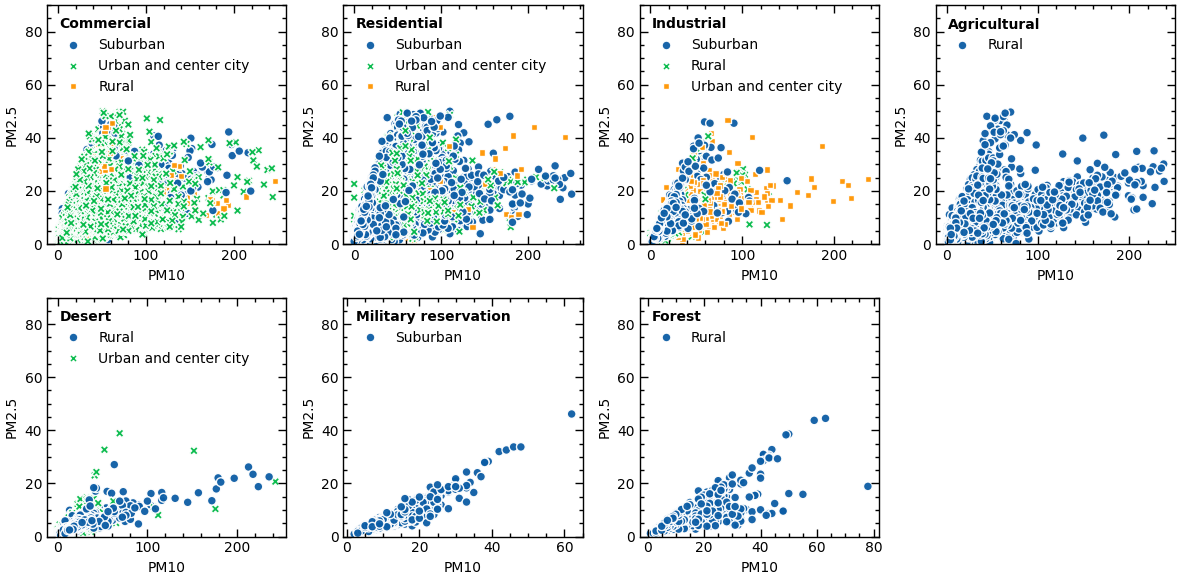

In [23]:
import itertools
plt.figure(figsize=(12,6))
for i,j in zip(np.arange(1,len(a)+1,1),a):
    plt.subplot(2,4,i)
    sns.scatterplot(data=data_all00[data_all00["Land Use"]==j],x="PM10",y="PM25",
                    hue="Location Setting",s=s,style="Location Setting",
                   alpha=0.95,edgecolor='w',lw=1,palette=None)
    plt.ylim(0,90)
    # Place the legend outside the plot
    plt.legend(title=j,loc='upper left',ncol=1,title_fontproperties={'weight':'bold'},alignment='left')
    plt.xlabel("PM10")
    plt.ylabel("PM2.5")
    plt.tight_layout()
plt.show()

In [24]:
# Function to calculate R-squared
def calculate_r2(x, y):
    return stats.pearsonr(x, y)[0]**2, stats.pearsonr(x, y)[1]

In [25]:
r2s,lu,ls,p_r2s=[],[],[],[]
for i in a:
    for j in ['Rural', 'Suburban', 'Urban and center city']:
        p=data_all00[(data_all00["Land Use"]==i)&(data_all00["Location Setting"]==j)][["PM10","PM25"]].dropna()
        if len(p)>=1:
            lu.append(i)
            ls.append(j)
            r2s.append(calculate_r2(p["PM10"],p["PM25"])[0])
            p_r2s.append(calculate_r2(p["PM10"],p["PM25"])[1])

pd.pivot_table(data=pd.DataFrame({"Land Use":lu,"Location Setting":ls,"R2":r2s,"p-value":p_r2s}),
              columns="Location Setting",index="Land Use",values="R2")

Location Setting,Rural,Suburban,Urban and center city
Land Use,,,
Agricultural,0.328484,NaN,NaN
Commercial,0.402887,0.353276,0.322978
Desert,0.674899,NaN,0.462127
Forest,0.628506,NaN,NaN
Industrial,0.740000,0.504620,0.346687
Military reservation,NaN,0.834403,NaN
Residential,0.431671,0.343073,0.361328


In [26]:
pd.pivot_table(data=pd.DataFrame({"Land Use":lu,"Location Setting":ls,"R2":r2s,"p-value":p_r2s}),
              columns="Location Setting",index="Land Use",values="p-value")

Location Setting,Rural,Suburban,Urban and center city
Land Use,,,
Agricultural,0.000000e+00,NaN,NaN
Commercial,0.000000e+00,0.0,0.000000e+00
Desert,0.000000e+00,NaN,1.996086e-143
Forest,2.983713e-234,NaN,NaN
Industrial,0.000000e+00,0.0,1.643530e-292
Military reservation,NaN,0.0,NaN
Residential,0.000000e+00,0.0,0.000000e+00


In [27]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

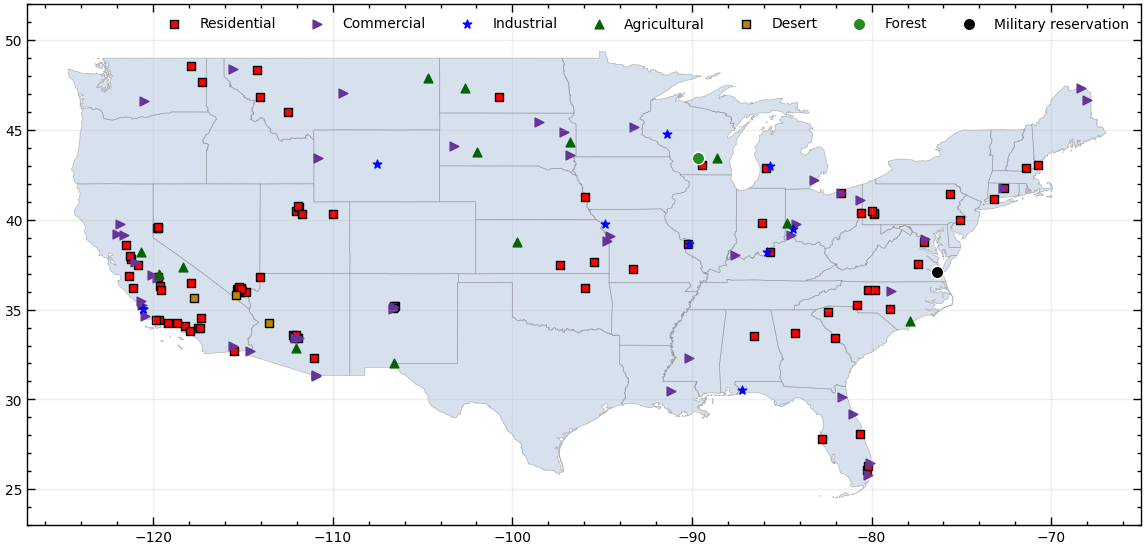

In [28]:
#'Commercial', 'Industrial', 'Commercial', 'Military reservation', 'Agricultural', 'Desert', 'Forest']:
lo1=data_sta00[data_sta00["Land Use"]=='Residential']["Longitude"].unique()
la1=data_sta00[data_sta00["Land Use"]=='Residential']["Latitude"].unique()
lo2=data_sta00[data_sta00["Land Use"]=='Industrial']["Longitude"].unique()
la2=data_sta00[data_sta00["Land Use"]=='Industrial']["Latitude"].unique()
lo3=data_sta00[data_sta00["Land Use"]=='Agricultural']["Longitude"].unique()
la3=data_sta00[data_sta00["Land Use"]=='Agricultural']["Latitude"].unique()
lo4=data_sta00[data_sta00["Land Use"]=='Desert']["Longitude"].unique()
la4=data_sta00[data_sta00["Land Use"]=='Desert']["Latitude"].unique()
lo5=data_sta00[data_sta00["Land Use"]=='Forest']["Longitude"].unique()
la5=data_sta00[data_sta00["Land Use"]=='Forest']["Latitude"].unique()
lo6=data_sta00[data_sta00["Land Use"]=='Military reservation']["Longitude"].unique()
la6=data_sta00[data_sta00["Land Use"]=='Military reservation']["Latitude"].unique()
lo7=data_sta00[data_sta00["Land Use"]=='Commercial']["Longitude"].unique()
la7=data_sta00[data_sta00["Land Use"]=='Commercial']["Latitude"].unique()

usa_map = gpd.read_file("cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
fig, ax = plt.subplots(figsize=(12, 10)) 
# Graficar el mapa base
usa_map.plot(ax=ax, color="lightsteelblue", edgecolor='gray', linewidth=0.5, alpha=0.5)
geo_df1 = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(lo1, la1)])
geo_df1.plot(ax=ax, markersize=40, color='red', marker='s', edgecolor="k", label='Residential')
geo_df7 = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(lo7, la7)])
geo_df7.plot(ax=ax, markersize=40, color='rebeccapurple', marker='>', label='Commercial')
geo_df2 = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(lo2, la2)])
geo_df2.plot(ax=ax, markersize=40, color='blue', marker='*', label='Industrial')
geo_df3 = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(lo3, la3)])
geo_df3.plot(ax=ax, markersize=40, color='darkgreen', marker='^', label='Agricultural')
geo_df4 = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(lo4, la4)])
geo_df4.plot(ax=ax, markersize=40, color='darkgoldenrod', edgecolor="black", marker='s', label='Desert')
geo_df5 = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(lo5, la5)])
geo_df5.plot(ax=ax, markersize=80, color='forestgreen', edgecolor="w", marker='o', label='Forest')
geo_df6 = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(lo6, la6)])
geo_df6.plot(ax=ax, markersize=80, color='black', marker='o', edgecolor="w", label='Military reservation')
plt.legend(ncol=7); plt.grid(alpha=0.2)
plt.xlim(-127,-65),plt.ylim(23,52)
plt.tight_layout()
plt.savefig("figures/Stations.pdf",dpi=300,bbox_inches='tight')
plt.show()

## Ploting distributions...

In [29]:
lim_pm10,lim_pm25=round(np.percentile(data_all00["PM10"],99.6)),round(np.percentile(data_all00["PM25"],99.6))
lim_r0=round(np.percentile(data_all00["r0"],99.6))
lim_r12,lim_r21=round(np.percentile(data_all00["r12"],99.6)),np.percentile(data_all00["r21"],99.6)
lim_pm10

122

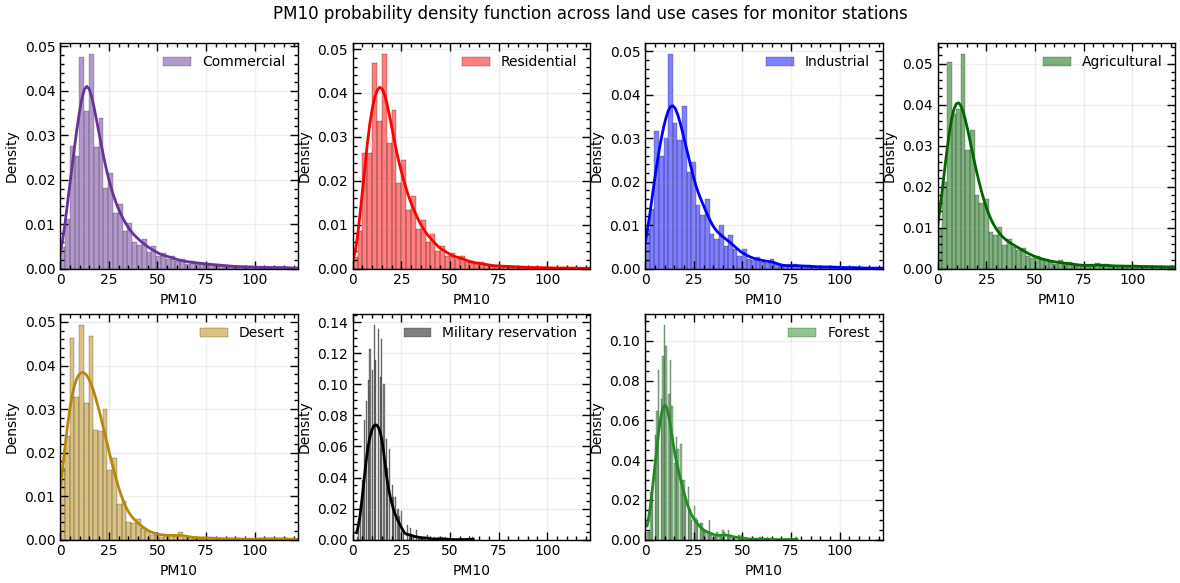

In [30]:
plt.figure(figsize=(12,6))
for i,j,k in zip(np.arange(1,len(a)+1,1),a,colors):
    plt.suptitle("PM10 probability density function across land use cases for monitor stations")
    #print(i,j,k)
    plt.subplot(2,4,i)
    sns.histplot(data=data_all00[data_all00["Land Use"]==j]["PM10"],label=j,kde=True,color=k,stat='density',bins=100)
    plt.xlim(0,lim_pm10); #plt.ylim(0,90)
    # Place the legend outside the plot
    plt.legend(loc='upper right',ncol=3)
    plt.tight_layout(h_pad=0.5,w_pad=0)
    plt.grid(alpha=0.2)
plt.show()

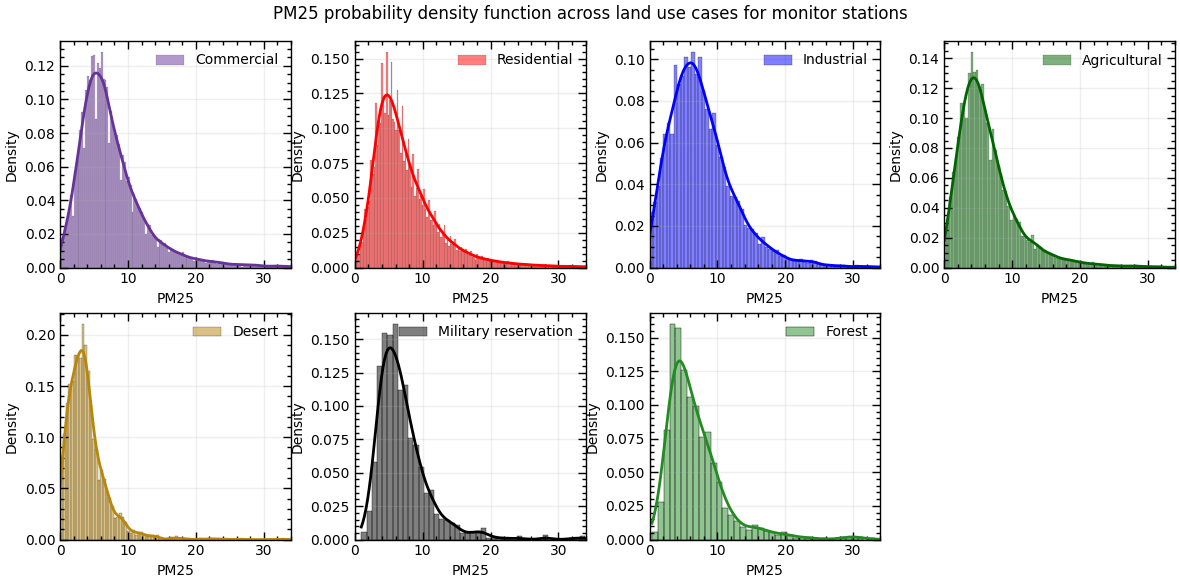

In [31]:
plt.figure(figsize=(12,6))
for i,j,k in zip(np.arange(1,len(a)+1,1),a,colors):
    plt.suptitle("PM25 probability density function across land use cases for monitor stations")
    #print(i,j,k)
    plt.subplot(2,4,i)
    sns.histplot(data=data_all00[data_all00["Land Use"]==j]["PM25"],label=j,kde=True,color=k,stat='density',bins="auto")
    plt.xlim(0,lim_pm25); #plt.ylim(0,90)
    # Place the legend outside the plot
    plt.legend(loc='upper right',ncol=3)
    plt.tight_layout(h_pad=0.5,w_pad=0)
    plt.grid(alpha=0.2)
plt.show()

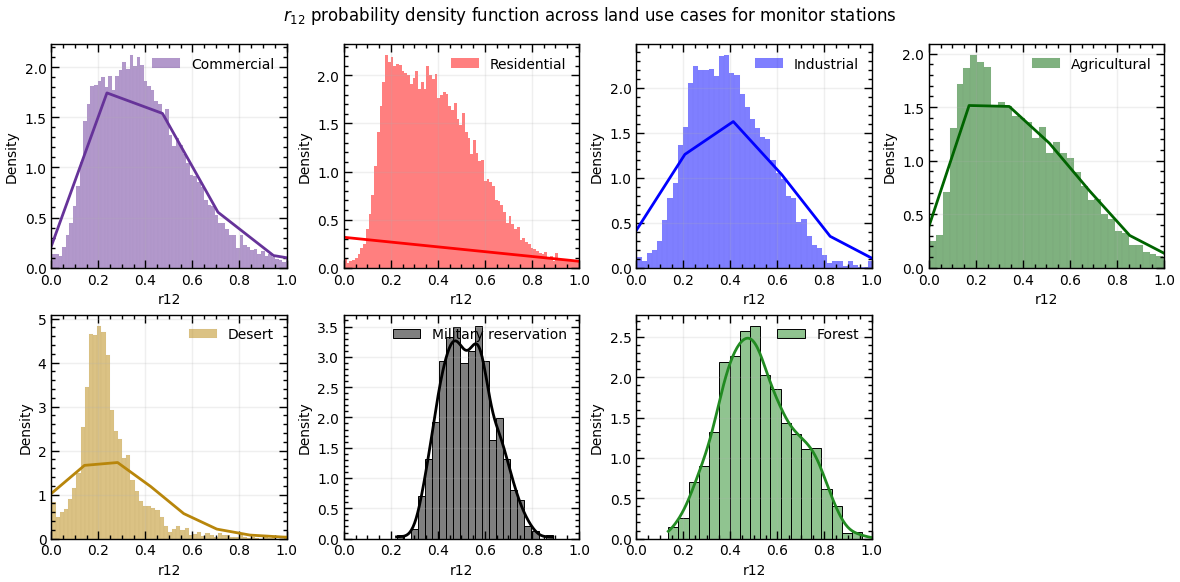

In [32]:
plt.figure(figsize=(12,6))
for i,j,k in zip(np.arange(1,len(a)+1,1),a,colors):
    plt.suptitle(r"$r_{12}$ probability density function across land use cases for monitor stations")
    #print(i,j,k)
    plt.subplot(2,4,i)
    sns.histplot(data=data_all00[data_all00["Land Use"]==j]["r12"],label=j,kde=True,color=k,stat='density',bins="auto")
    plt.xlim(0,lim_r12); #plt.ylim(0,90)
    # Place the legend outside the plot
    plt.legend(loc='upper right',ncol=3)
    plt.tight_layout(h_pad=0.5,w_pad=0)
    plt.grid(alpha=0.2)
plt.show()

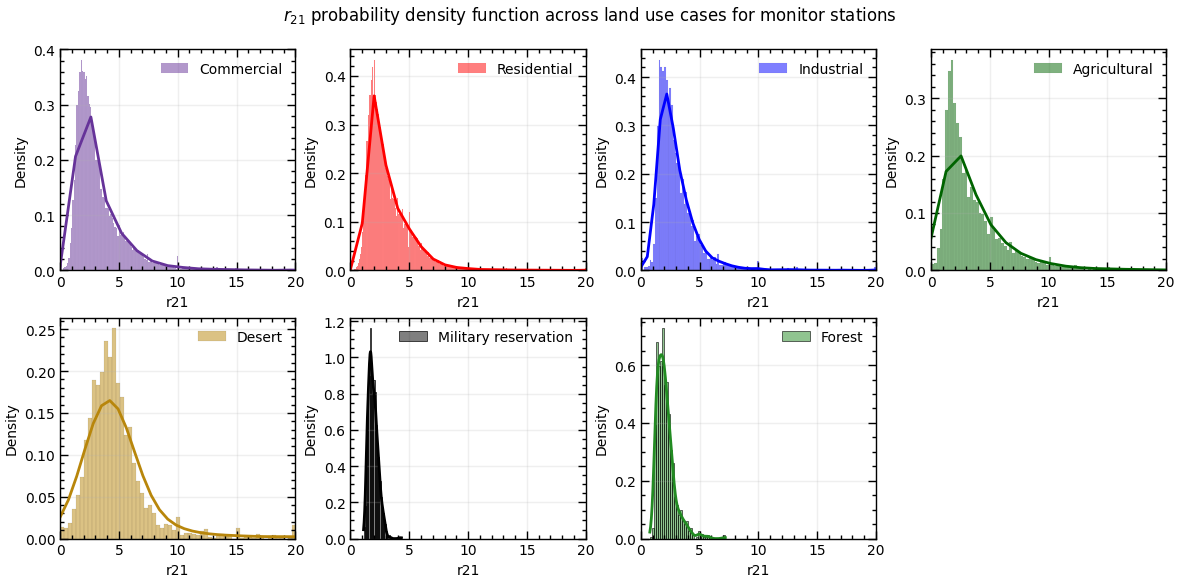

In [33]:
plt.figure(figsize=(12,6))
for i,j,k in zip(np.arange(1,len(a)+1,1),a,colors):
    plt.suptitle(r"$r_{21}$ probability density function across land use cases for monitor stations")
    #print(i,j,k)
    plt.subplot(2,4,i)
    sns.histplot(data=data_all00[data_all00["Land Use"]==j]["r21"],label=j,kde=True,color=k,stat='density',bins="auto")
    plt.xlim(0,lim_r21); #plt.ylim(0,90)
    # Place the legend outside the plot
    plt.legend(loc='upper right',ncol=3)
    plt.tight_layout(h_pad=0.5,w_pad=0)
    plt.grid(alpha=0.2)
plt.show()

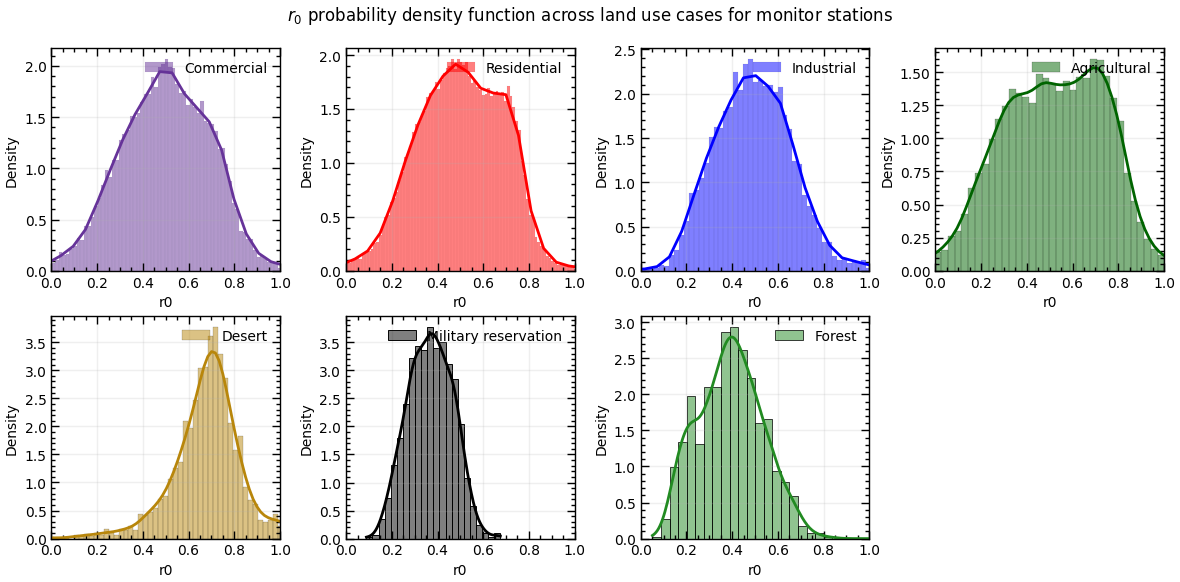

In [34]:
plt.figure(figsize=(12,6))
for i,j,k in zip(np.arange(1,len(a)+1,1),a,colors):
    plt.suptitle(r"$r_{0}$ probability density function across land use cases for monitor stations")
    #print(i,j,k)
    plt.subplot(2,4,i)
    sns.histplot(data=data_all00[data_all00["Land Use"]==j]["r0"],label=j,kde=True,color=k,stat='density',bins="auto")
    plt.xlim(0,lim_r0); #plt.ylim(0,90)
    # Place the legend outside the plot
    plt.legend(loc='upper right',ncol=3)
    plt.tight_layout(h_pad=0.5,w_pad=0)
    plt.grid(alpha=0.2)
plt.show()

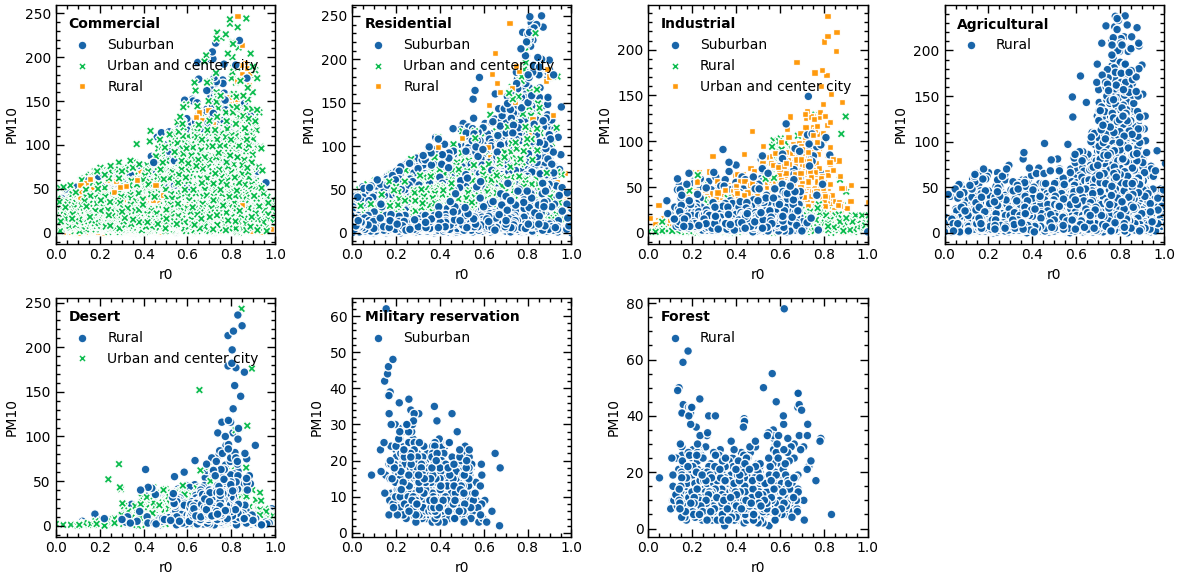

In [35]:
import itertools
plt.figure(figsize=(12,6))
for i,j in zip(np.arange(1,len(a)+1,1),a):
    plt.subplot(2,4,i)
    sns.scatterplot(data=data_all00[data_all00["Land Use"]==j],x="r0",y="PM10",
                    hue="Location Setting",s=s,style="Location Setting",
                   alpha=0.95,edgecolor='w',lw=1,palette=None)
    plt.xlim(0,lim_r0)
    # Place the legend outside the plot
    plt.legend(title=j,loc='upper left',ncol=1,title_fontproperties={'weight':'bold'},alignment='left')
    #plt.xlabel("PM10")
    #plt.ylabel("PM2.5")
    plt.tight_layout()
plt.show()

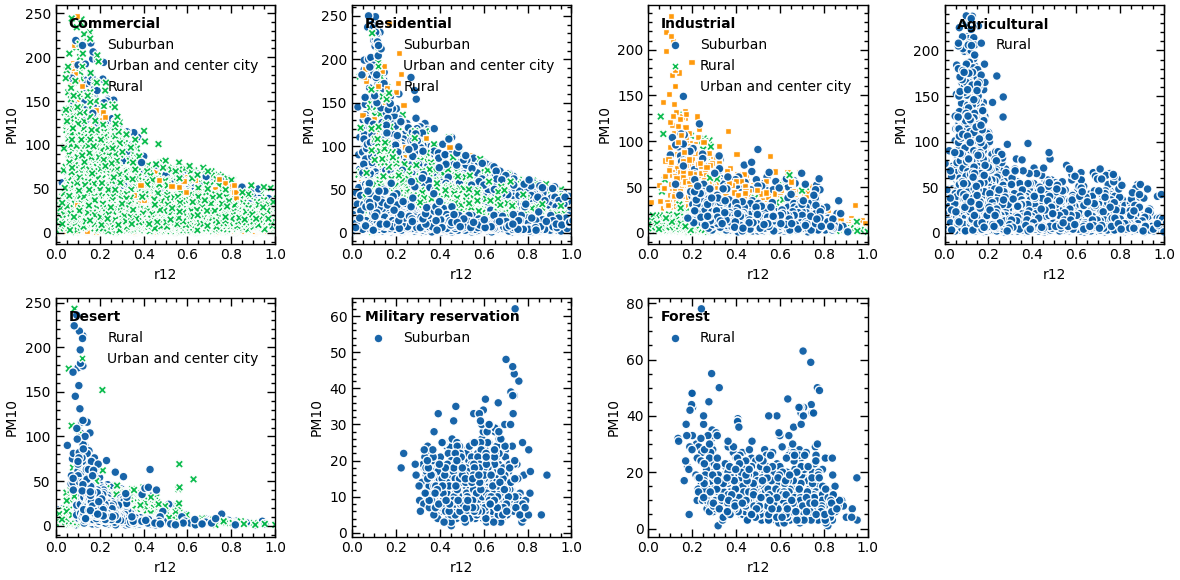

In [36]:
import itertools
plt.figure(figsize=(12,6))
for i,j in zip(np.arange(1,len(a)+1,1),a):
    plt.subplot(2,4,i)
    sns.scatterplot(data=data_all00[data_all00["Land Use"]==j],x="r12",y="PM10",
                    hue="Location Setting",s=s,style="Location Setting",
                   alpha=0.95,edgecolor='w',lw=1,palette=None)
    plt.xlim(0,lim_r12)
    # Place the legend outside the plot
    plt.legend(title=j,loc='upper left',ncol=1,title_fontproperties={'weight':'bold'},alignment='left')
    #plt.xlabel("PM10")
    #plt.ylabel("PM2.5")
    plt.tight_layout()
plt.show()

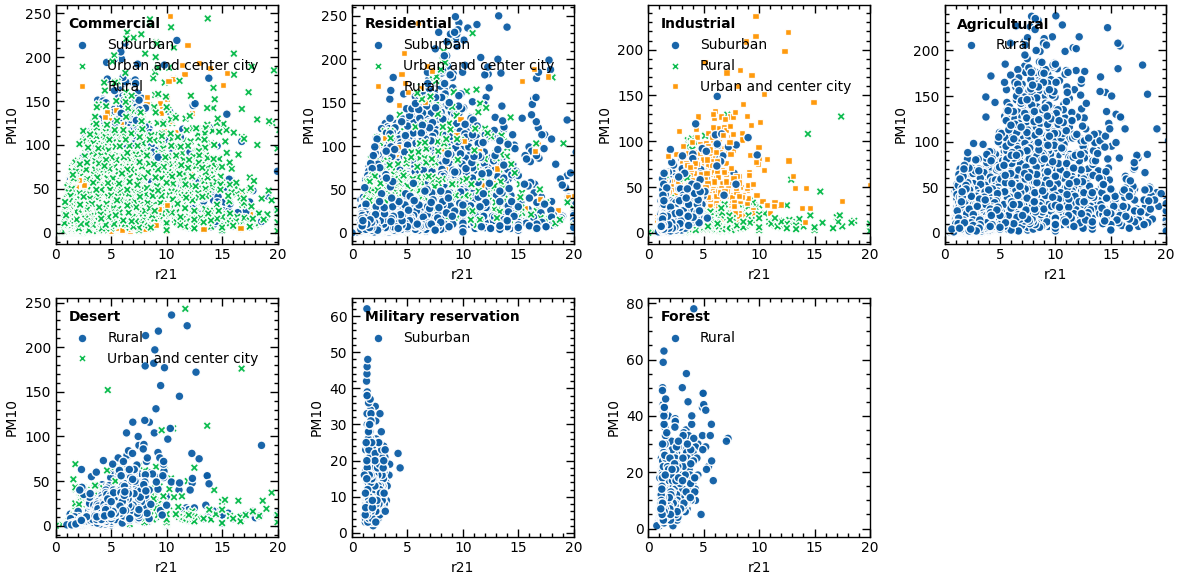

In [37]:
import itertools
plt.figure(figsize=(12,6))
for i,j in zip(np.arange(1,len(a)+1,1),a):
    plt.subplot(2,4,i)
    sns.scatterplot(data=data_all00[data_all00["Land Use"]==j],x="r21",y="PM10",
                    hue="Location Setting",s=s,style="Location Setting",
                   alpha=0.95,edgecolor='w',lw=1,palette=None)
    plt.xlim(0,lim_r21)
    # Place the legend outside the plot
    plt.legend(title=j,loc='upper left',ncol=1,title_fontproperties={'weight':'bold'},alignment='left')
    #plt.xlabel("PM10")
    #plt.ylabel("PM2.5")
    plt.tight_layout()
plt.show()

## Tables...

In [38]:
r2s0,lu0,ls0,p_r2s0,var10,var20=[],[],[],[],[],[]
for i in a:
    for j in ['Rural', 'Suburban', 'Urban and center city']:
        for k in ["PM10","PM25","r0","r12","r21"]:
            for l in ["PM10","PM25","r0","r12","r21","FDI"]:
                p=data_all00[(data_all00["Land Use"]==i)&(data_all00["Location Setting"]==j)][["PM10","PM25","r0","r12","r21","FDI"]].dropna()
                if len(p)>=1:
                    lu0.append(i)
                    ls0.append(j)
                    r2s0.append(calculate_r2(p[k],p[l])[0])
                    p_r2s0.append(calculate_r2(p[k],p[l])[1])
                    var10.append(k)
                    var20.append(l)
print("DOne..!")

DOne..!


In [39]:
summary=pd.DataFrame({"Land Use":lu0,"Location Setting":ls0,"Var1":var10,"Var2":var20,"R2":r2s0,"p-value":p_r2s0})

In [40]:
summary

,Land Use,Location Setting,Var1,Var2,R2,p-value
0,Commercial,Rural,PM10,PM10,1.000000,0.000000e+00
1,Commercial,Rural,PM10,PM25,0.402887,0.000000e+00
2,Commercial,Rural,PM10,r0,0.102900,2.803571e-77
3,Commercial,Rural,PM10,r12,0.022009,3.644072e-17
4,Commercial,Rural,PM10,r21,0.266965,2.387274e-217
...,...,...,...,...,...,...
415,Forest,Rural,r21,PM25,0.060154,2.842764e-16
416,Forest,Rural,r21,r0,0.777960,0.000000e+00
417,Forest,Rural,r21,r12,0.801071,0.000000e+00
418,Forest,Rural,r21,r21,1.000000,0.000000e+00


In [41]:
summary[(summary["Var1"]=="r21")&(summary["R2"]>=0.5)&(summary["Var2"]!="r21")]

,Land Use,Location Setting,Var1,Var2,R2,p-value
236,Industrial,Suburban,r21,r0,0.820136,0.000000e+00
237,Industrial,Suburban,r21,r12,0.807049,0.000000e+00
239,Industrial,Suburban,r21,FDI,0.706845,0.000000e+00
266,Industrial,Urban and center city,r21,r0,0.583804,0.000000e+00
267,Industrial,Urban and center city,r21,r12,0.513898,0.000000e+00
386,Military reservation,Suburban,r21,r0,0.852772,0.000000e+00
387,Military reservation,Suburban,r21,r12,0.925343,0.000000e+00
389,Military reservation,Suburban,r21,FDI,0.859564,0.000000e+00
416,Forest,Rural,r21,r0,0.777960,0.000000e+00
417,Forest,Rural,r21,r12,0.801071,0.000000e+00


## Another standarized variables...

In [42]:
## Metereological Stations...
def season_from_date(dt):
    """Devuelve la estación climatológica USA dada una fecha."""
    month = dt.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"

data_all00 = data_all00.copy()
data_all00["Season"] = data_all00.index.map(season_from_date)
data_all00["Year"] = data_all00.index.year
data_all00

,Latitude,Longitude,PM10,PM25,Land Use,Location Setting,r21,r12,PM10+PM25,PM10-PM25,r0,FDI,Season,Year
Date Local,,,,,,,,,,,,,,
2022-01-29,21.323745,-158.088613,14.0,3.75,Commercial,Suburban,3.636364,0.265957,17.75,11.25,0.630252,0.098337,Winter,2022
2022-01-30,21.323745,-158.088613,11.0,2.70,Commercial,Suburban,3.928571,0.243243,13.70,9.30,0.673913,0.079318,Winter,2022
2022-01-31,21.323745,-158.088613,15.0,3.70,Commercial,Suburban,3.947368,0.245033,18.70,12.30,0.654255,0.084719,Winter,2022
2022-02-01,21.323745,-158.088613,15.0,3.25,Commercial,Suburban,4.477612,0.215232,18.25,12.75,0.694823,0.065684,Winter,2022
2022-02-02,21.323745,-158.088613,13.0,3.60,Commercial,Suburban,3.513514,0.274809,16.60,10.40,0.622754,0.103671,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,61.205861,-149.824602,16.0,18.10,Residential,Suburban,0.879121,1.124224,34.10,-1.10,-0.032164,1.160383,Winter,2024
2024-12-28,61.205861,-149.824602,11.0,13.10,Residential,Suburban,0.833333,1.180180,24.10,-1.10,-0.045455,1.233825,Winter,2024
2024-12-29,61.205861,-149.824602,8.0,8.60,Residential,Suburban,0.919540,1.061728,16.60,0.40,0.023952,1.036298,Winter,2024


In [43]:
import scipy.stats as stats
var1,lu1,ls1,sea=[],[],[],[]
mean1,std1,kurt1,skee1=[],[],[],[]
for i in a:
    for j in ['Rural', 'Suburban', 'Urban and center city']:
        for k in ["PM10","PM25","r0","r12","r21","FDI"]:
            for l in ["Winter","Spring","Summer","Autumn"]:
                p=data_all00[(data_all00["Land Use"]==i)&(data_all00["Location Setting"]==j)\
                    &(data_all00["Season"]==l)][["PM10","PM25","r0","r12","r21","FDI"]].dropna()
                if len(p)>=1:
                    sea.append(l)
                    lu1.append(i)
                    ls1.append(j)
                    mean1.append(np.mean(p[k]))
                    std1.append(np.std(p[k]))
                    kurt1.append(stats.kurtosis(p[k]))
                    skee1.append(stats.skew(p[k]))
                    var1.append(k)

print("DOne..!")

DOne..!


In [44]:
summary1=pd.DataFrame({"Land Use":lu1,"Location Setting":ls1,"Variable":var1,"Season":sea,
                       "Mean":mean1,"Std":std1,"Skew":skee1,"Kurt":kurt1})
summary1.to_csv("final_data/Summary1.csv",index=False)

In [45]:
summary1

,Land Use,Location Setting,Variable,Season,Mean,Std,Skew,Kurt
0,Commercial,Rural,PM10,Winter,19.501896,26.786692,2.966236,11.943852
1,Commercial,Rural,PM10,Spring,22.531443,26.791379,2.785733,10.655126
2,Commercial,Rural,PM10,Summer,24.288698,15.177458,1.997904,8.100078
3,Commercial,Rural,PM10,Autumn,27.992258,24.027188,2.210496,10.915755
4,Commercial,Rural,PM25,Winter,6.621049,5.546749,1.208666,1.158567
...,...,...,...,...,...,...,...,...
331,Forest,Rural,r21,Autumn,2.425373,0.957269,1.639728,3.106549
332,Forest,Rural,FDI,Winter,0.478218,0.173062,-0.186299,-0.758986
333,Forest,Rural,FDI,Spring,0.317402,0.141899,0.377897,-0.212848
334,Forest,Rural,FDI,Summer,0.280752,0.131205,0.926132,0.375409


In [46]:
# Pivot de summary1: columnas = variable+stat
summary_wide = summary1.pivot_table(
    index=["Land Use", "Location Setting", "Season"],
    columns="Variable",
    values=["Mean", "Skew", "Kurt"]
)

# Aplanar columnas MultiIndex
summary_wide.columns = [f"{stat}_{var}" for stat, var in summary_wide.columns]
summary_wide = summary_wide.reset_index()

In [47]:
features = ["Mean_FDI", "Mean_r0", "Skew_r0", "Kurt_r0"]

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(summary_wide[features])

scaled_df = pd.DataFrame(scaled, columns=[f"{f}_z" for f in features])
summary_std = pd.concat([summary_wide, scaled_df], axis=1)
## Calcular IFS: Usamos los pesos heurísticos que discutimos antes:
## IFS=(+1)FDI_z+(−1)r0_mean,z+(0.5)r0_skew,z+(0.5)r0_kurt,z
 
summary_std["IFS"] = (
    summary_std["Mean_FDI_z"]*1.0 +
    summary_std["Mean_r0_z"]*-1.0 +
    summary_std["Skew_r0_z"]*0.5 +
    summary_std["Kurt_r0_z"]*0.5
)

In [49]:
summary_wide

,Land Use,Location Setting,Season,Kurt_FDI,Kurt_PM10,Kurt_PM25,Kurt_r0,Kurt_r12,Kurt_r21,Mean_FDI,...,Mean_PM25,Mean_r0,Mean_r12,Mean_r21,Skew_FDI,Skew_PM10,Skew_PM25,Skew_r0,Skew_r12,Skew_r21
0,Agricultural,Rural,Autumn,13.958002,10.085588,11.813985,-0.050850,4.824212,417.373048,0.215063,...,6.572554,0.554546,0.364699,4.465169,3.004846,2.902861,2.558834,-0.445456,1.687360,15.953831
1,Agricultural,Rural,Spring,974.576077,17.360613,12.317052,4.216022,659.518227,518.326027,0.258860,...,5.849770,0.526061,0.420604,3.945628,27.794146,3.645151,2.578709,0.369514,21.879937,17.685930
2,Agricultural,Rural,Summer,23.025539,16.765891,10.900671,-0.278559,7.507883,1363.294847,0.205181,...,7.945385,0.529280,0.364576,3.709736,3.085534,3.575176,2.671710,-0.255545,1.517078,30.559151
3,Agricultural,Rural,Winter,843.144542,26.601915,6.320307,2.542206,441.212119,246.321275,0.466254,...,5.540803,0.451308,0.599394,3.957226,24.392989,4.490113,1.877286,0.375859,17.122120,13.510800
4,Commercial,Rural,Autumn,750.088312,10.915755,7.361971,4.341775,718.855874,1.177813,0.278831,...,7.454581,0.552021,0.406219,3.649798,27.250814,2.210496,2.035449,-0.679047,26.405029,1.024923
5,Commercial,Rural,Spring,75.963006,10.655126,21.143197,3.279884,68.753726,72.373149,0.835439,...,4.899075,0.553033,0.770601,4.149046,8.580843,2.785733,3.419885,-1.504355,8.186652,5.561362
6,Commercial,Rural,Summer,5.543322,8.100078,17.183324,0.359922,2.280372,34.501535,0.157703,...,6.910258,0.578096,0.317919,3.822712,2.136313,1.997904,3.325586,-0.631923,1.355314,3.551806
7,Commercial,Rural,Winter,159.285850,11.943852,1.158567,234.024525,122.493706,31.727405,0.942355,...,6.621049,0.435069,0.911824,2.770322,11.605689,2.966236,1.208666,11.245869,10.229802,4.385968
8,Commercial,Suburban,Autumn,2231.657301,11.059983,6.631601,3.465262,1533.885163,325.871053,0.215194,...,7.474099,0.539899,0.371518,3.851156,43.760941,2.849080,1.947556,0.176817,35.096204,15.528492
9,Commercial,Suburban,Spring,1036.045924,11.579575,6.238002,0.810453,707.864169,318.255722,0.225196,...,6.086268,0.534987,0.388418,3.889981,28.615005,2.692272,1.477598,0.256540,22.751097,15.239520


In [50]:
summary_std

,Land Use,Location Setting,Season,Kurt_FDI,Kurt_PM10,Kurt_PM25,Kurt_r0,Kurt_r12,Kurt_r21,Mean_FDI,...,Skew_PM10,Skew_PM25,Skew_r0,Skew_r12,Skew_r21,Mean_FDI_z,Mean_r0_z,Skew_r0_z,Kurt_r0_z,IFS
0,Agricultural,Rural,Autumn,13.958002,10.085588,11.813985,-0.050850,4.824212,417.373048,0.215063,...,2.902861,2.558834,-0.445456,1.687360,15.953831,-0.460422,0.385376,-0.459728,-0.355199,-1.253261
1,Agricultural,Rural,Spring,974.576077,17.360613,12.317052,4.216022,659.518227,518.326027,0.258860,...,3.645151,2.578709,0.369514,21.879937,17.685930,-0.207996,0.097091,-0.283271,-0.326477,-0.609961
2,Agricultural,Rural,Summer,23.025539,16.765891,10.900671,-0.278559,7.507883,1363.294847,0.205181,...,3.575176,2.671710,-0.255545,1.517078,30.559151,-0.517379,0.129670,-0.418609,-0.356732,-1.034719
3,Agricultural,Rural,Winter,843.144542,26.601915,6.320307,2.542206,441.212119,246.321275,0.466254,...,4.490113,1.877286,0.375859,17.122120,13.510800,0.987338,-0.659433,-0.281897,-0.337744,1.336951
4,Commercial,Rural,Autumn,750.088312,10.915755,7.361971,4.341775,718.855874,1.177813,0.278831,...,2.210496,2.035449,-0.679047,26.405029,1.024923,-0.092888,0.359816,-0.510306,-0.325630,-0.870672
5,Commercial,Rural,Spring,75.963006,10.655126,21.143197,3.279884,68.753726,72.373149,0.835439,...,2.785733,3.419885,-1.504355,8.186652,5.561362,3.115172,0.370062,-0.689002,-0.332778,2.234221
6,Commercial,Rural,Summer,5.543322,8.100078,17.183324,0.359922,2.280372,34.501535,0.157703,...,1.997904,3.325586,-0.631923,1.355314,3.551806,-0.791024,0.623709,-0.500102,-0.352434,-1.841001
7,Commercial,Rural,Winter,159.285850,11.943852,1.158567,234.024525,122.493706,31.727405,0.942355,...,2.966236,1.208666,11.245869,10.229802,4.385968,3.731392,-0.823772,2.071682,1.220477,6.201244
8,Commercial,Suburban,Autumn,2231.657301,11.059983,6.631601,3.465262,1533.885163,325.871053,0.215194,...,2.849080,1.947556,0.176817,35.096204,15.528492,-0.459668,0.237145,-0.324994,-0.331530,-1.025074
9,Commercial,Suburban,Spring,1036.045924,11.579575,6.238002,0.810453,707.864169,318.255722,0.225196,...,2.692272,1.477598,0.256540,22.751097,15.239520,-0.402022,0.187432,-0.307732,-0.349401,-0.918021


In [51]:
summary_std.sort_values("IFS", ascending=False).head(15)

,Land Use,Location Setting,Season,Kurt_FDI,Kurt_PM10,Kurt_PM25,Kurt_r0,Kurt_r12,Kurt_r21,Mean_FDI,...,Skew_PM10,Skew_PM25,Skew_r0,Skew_r12,Skew_r21,Mean_FDI_z,Mean_r0_z,Skew_r0_z,Kurt_r0_z,IFS
7,Commercial,Rural,Winter,159.285850,11.943852,1.158567,234.024525,122.493706,31.727405,0.942355,...,2.966236,1.208666,11.245869,10.229802,4.385968,3.731392,-0.823772,2.071682,1.220477,6.201244
54,Residential,Urban and center city,Summer,3264.756415,19.648280,10.153635,604.588701,3178.052933,24.291912,0.360797,...,2.816371,2.434748,20.015095,54.435032,3.159433,0.379529,-0.109809,3.970399,3.714925,4.332000
50,Residential,Suburban,Summer,65.016258,11.290225,9.640345,724.332426,31.197826,486.964335,0.188439,...,2.375137,2.350415,18.125169,2.547979,17.010389,-0.613872,0.242712,3.561191,4.520979,3.184501
27,Forest,Rural,Winter,-0.758986,2.459601,2.342387,0.422971,-0.257458,12.370727,0.478218,...,1.327628,1.485390,0.809558,-0.465085,2.842141,1.056294,-2.346410,-0.187992,-0.352009,3.132704
31,Industrial,Rural,Winter,88.567316,14.881822,1.588654,170.626059,70.082155,52.578904,0.726281,...,2.684386,1.107574,10.152926,8.057058,5.769879,2.486030,1.139200,1.835038,0.793711,2.661204
47,Residential,Rural,Winter,269.255965,56.365967,15.289408,379.633764,278.273775,144.906769,0.292668,...,5.626989,2.899551,14.481635,13.993906,10.135627,-0.013141,-0.103810,2.772292,2.200644,2.577137
43,Military reservation,Suburban,Winter,-0.324104,0.391884,1.780225,-0.097956,-0.278471,1.632219,0.426795,...,0.720326,1.221950,0.421514,-0.185007,1.170784,0.759914,-2.085704,-0.272012,-0.355516,2.531855
5,Commercial,Rural,Spring,75.963006,10.655126,21.143197,3.279884,68.753726,72.373149,0.835439,...,2.785733,3.419885,-1.504355,8.186652,5.561362,3.115172,0.370062,-0.689002,-0.332778,2.234221
51,Residential,Suburban,Winter,1972.603385,21.695610,6.183005,194.320895,1437.924894,773.522633,0.361485,...,3.169374,2.135038,4.805744,34.048537,20.589136,0.383493,-0.838133,0.677264,0.953212,2.036864
13,Commercial,Urban and center city,Spring,1222.578964,22.551125,6.787645,480.772593,814.743397,1501.762657,0.224835,...,3.451002,1.739537,11.416951,24.842469,30.062263,-0.404100,0.113535,2.108725,2.881459,1.977457


## Un heatmap estacional:
perfecto para visualizar rápidamente cómo cambia el IFS entre usos de suelo y temporadas.

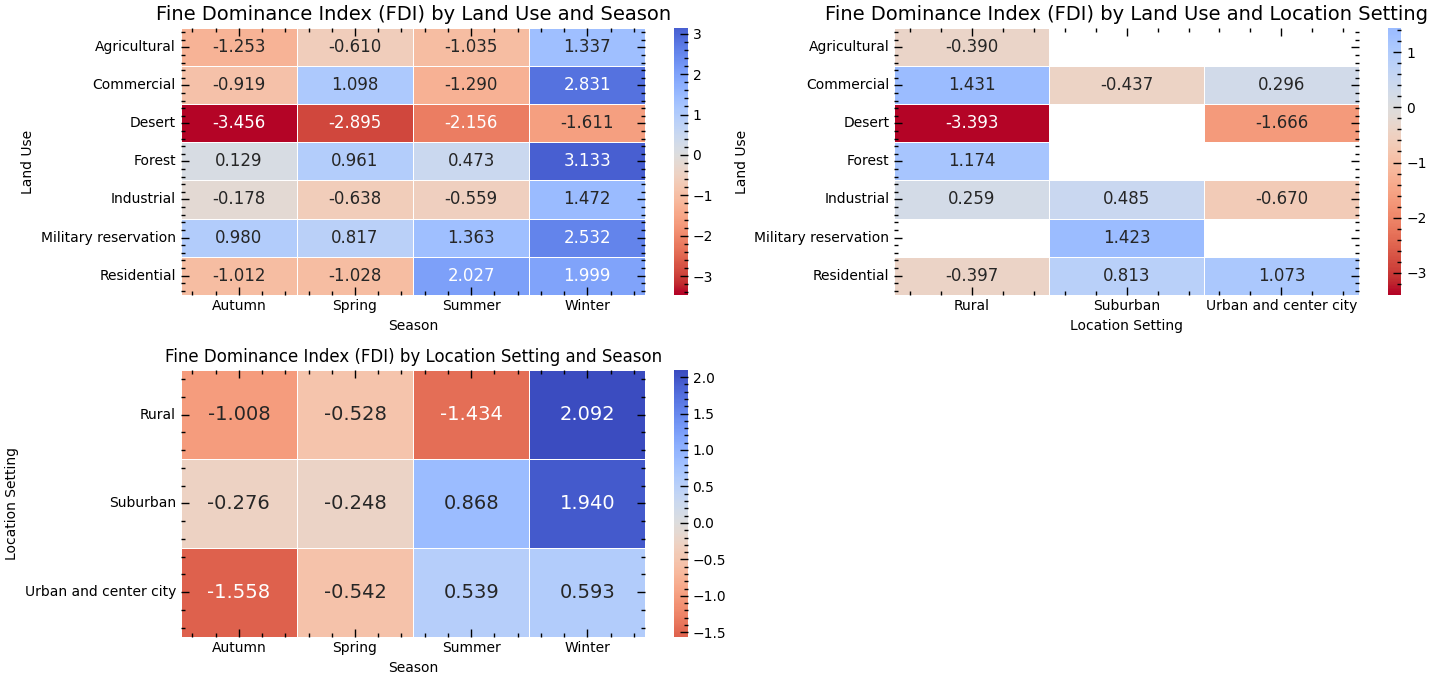

In [52]:
## heatmap estacional

plt.figure(figsize=(15,7))
plt.subplot(221)
# Creamos tabla pivotada: filas=Land Use, columnas=Season, valores=IFS
heatmap_data = summary_std.pivot_table(index="Land Use",columns="Season",values="IFS",aggfunc="mean")
# Dibujamos heatmap
sns.heatmap(heatmap_data,cmap="coolwarm_r",annot=True,fmt=".3f",center=0,linewidths=0.5,annot_kws={"fontsize":12})
plt.title("Fine Dominance Index (FDI) by Land Use and Season", fontsize=14)
plt.ylabel("Land Use"); plt.xlabel("Season")
plt.subplot(222)
# Creamos tabla pivotada: filas=Land Use, columnas=Location Setting, valores=IFS
heatmap_data = summary_std.pivot_table(index="Land Use",columns="Location Setting",values="IFS",aggfunc="mean")
# Dibujamos heatmap
sns.heatmap(heatmap_data,cmap="coolwarm_r",annot=True,fmt=".3f",center=0,linewidths=0.5,annot_kws={"fontsize":12})
plt.title("Fine Dominance Index (FDI) by Land Use and Location Setting", fontsize=14)
plt.ylabel("Land Use"); plt.xlabel("Location Setting")
plt.subplot(223)
# Creamos tabla pivotada: filas=Location Setting, columnas=Season, valores=IFS
heatmap_data = summary_std.pivot_table(index="Location Setting",columns="Season",values="IFS",aggfunc="mean")
# Dibujamos heatmap
sns.heatmap(heatmap_data,cmap="coolwarm_r",annot=True,fmt=".3f",center=0,linewidths=0.5,annot_kws={"fontsize":14})
plt.title("Fine Dominance Index (FDI) by Location Setting and Season", fontsize=12)
plt.ylabel("Location Setting"); plt.xlabel("Season")
plt.tight_layout()
plt.savefig("figures/fig1_fdi_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/8n/h_rtmhz56bd84hgb5_cp68fc0000gn/T/ipykernel_55395/336278288.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm_r').copy()


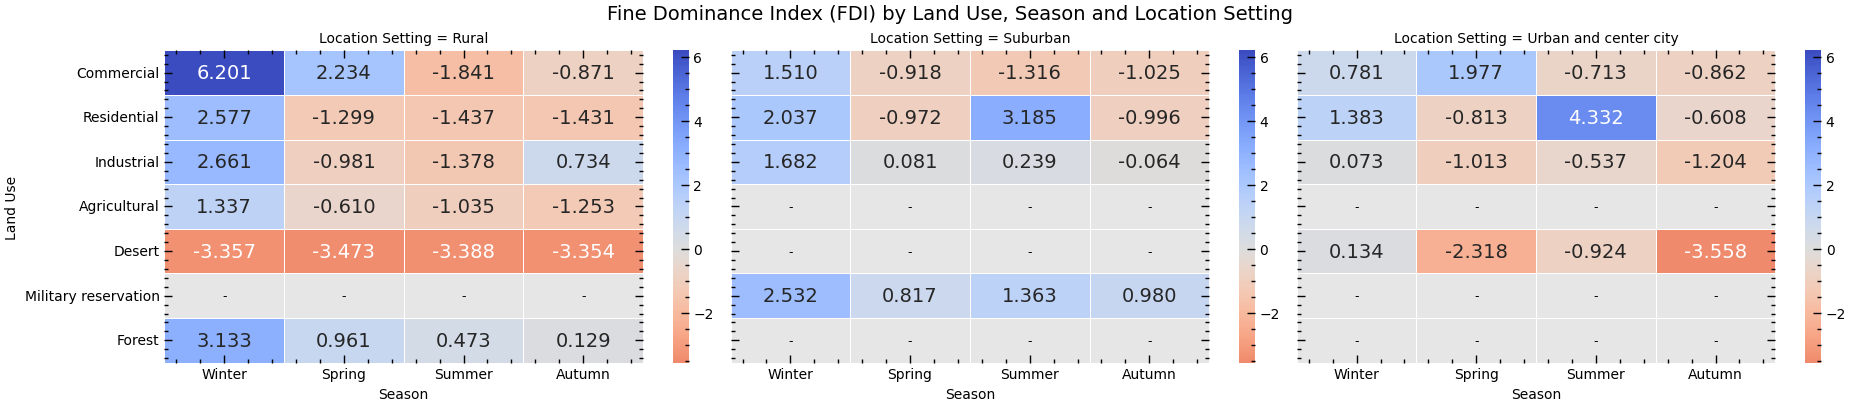

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

order_lu = ['Commercial','Residential','Industrial','Agricultural',
            'Desert','Military reservation','Forest']
order_season = ['Winter','Spring','Summer','Autumn']
order_loc = ['Rural','Suburban','Urban and center city']

# escala común para todas las facetas
vmin = summary_std['IFS'].min()
vmax = summary_std['IFS'].max()

cmap = plt.cm.get_cmap('coolwarm_r').copy()
cmap.set_bad('#e6e6e6')   # gris claro para celdas sin datos

def plot_heatmap_w_na(data, **kwargs):
    pivot = (data.pivot_table(index="Land Use", columns="Season", values="IFS", aggfunc="mean")
                  .reindex(index=order_lu, columns=order_season))
    ax = sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f",
                     center=0, vmin=vmin, vmax=vmax, linewidths=0.5,
                     cbar=True, annot_kws={"fontsize":14}, **kwargs)
    # escribe "NA" donde no hay dato
    for i, lu in enumerate(order_lu):
        for j, se in enumerate(order_season):
            if np.isnan(pivot.loc[lu, se]):
                ax.text(j+0.5, i+0.5, "-", ha='center', va='center', fontsize=9, color='black')

def plot_heatmap(data, **kwargs):
    pivot = (data.pivot_table(index="Land Use", columns="Season", values="IFS", aggfunc="mean")
                  .reindex(index=order_lu, columns=order_season))   # <- fuerza filas/cols
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f",
                center=0, vmin=vmin, vmax=vmax, linewidths=0.5,
                cbar=True, annot_kws={"fontsize":14}, **kwargs)

g = sns.FacetGrid(summary_std, col="Location Setting", col_order=order_loc,
                  height=4, aspect=1.6)
g.map_dataframe(plot_heatmap_w_na)

g.fig.suptitle("Fine Dominance Index (FDI) by Land Use, Season and Location Setting",
               fontsize=14, y=1.03)
plt.savefig("figures/fig2_fdi_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


## Hotspots / Coldspots de IFS (con filtro de tamaño muestral)
Aquí "n" es el tamaño muestral usado en cada celda (combinación de Land Use × Location Setting × Season).
Con el código, es el número de filas de "data_all00" que caen en esa combinación —es decir, el número de mediciones (p. ej. días) sumadas sobre todas las estaciones de ese grupo.
⚠️ No es el número de estaciones distintas.

In [54]:
import pandas as pd
import numpy as np

# 0) Parámetros
MIN_SAMPLES = 300   # ajusta según tu cobertura temporal (ej. 1 temporada x ~3 años diarios ~ 270)

# 1) Conteo de muestras por combinación (para filtrar casos frágiles)
n_df = (
    data_all00
    .groupby(["Land Use","Location Setting","Season"])
    .size()
    .rename("n")
    .reset_index()
)

# 2) Une el conteo con el resumen estandarizado (summary_std)
ifs_df = summary_std.merge(n_df, on=["Land Use","Location Setting","Season"], how="left")

# 3) Filtra por tamaño mínimo
ifs_df_f = ifs_df.loc[ifs_df["n"] >= MIN_SAMPLES].copy()

# 4) Tablas TOP (hotspots) y BOTTOM (coldspots)
cols_show = ["Land Use","Location Setting","Season","IFS","Mean_FDI","Mean_r0","Skew_r0","Kurt_r0","n"]

top_hotspots   = ifs_df_f.sort_values("IFS", ascending=False).loc[:, cols_show].head(10)
bottom_cold    = ifs_df_f.sort_values("IFS", ascending=True ).loc[:, cols_show].head(10)

print("TOP 10 hotspots (IFS más alto) — más ‘finos/antropogénicos’\n")
display(top_hotspots.round(2))

print("\nBOTTOM 10 coldspots (IFS más bajo) — más ‘gruesos/naturales’\n")
display(bottom_cold.round(2))

# 5) (Opcional) Hot/cold por Location Setting o por Land Use
def ranked_by(group_key="Location Setting", k=5):
    out_top, out_bottom = [], []
    for name, g in ifs_df_f.groupby(group_key):
        g2 = g.sort_values("IFS", ascending=False).loc[:, cols_show]
        out_top.append((name, g2.head(k)))
        out_bottom.append((name, g.sort_values("IFS", ascending=True).loc[:, cols_show].head(k)))
    return out_top, out_bottom

top_by_loc, bottom_by_loc = ranked_by("Location Setting", k=5)
top_by_lu,  bottom_by_lu  = ranked_by("Land Use", k=5)

# Ejemplo: imprime los 5 mejores por Location Setting
for name, tbl in top_by_loc:
    print(f"\n— TOP 5 en {name} —")
    display(tbl.round(2))


TOP 10 hotspots (IFS más alto) — más ‘finos/antropogénicos’



,Land Use,Location Setting,Season,IFS,Mean_FDI,Mean_r0,Skew_r0,Kurt_r0,n
7,Commercial,Rural,Winter,6.20,0.94,0.44,11.25,234.02,791
54,Residential,Urban and center city,Summer,4.33,0.36,0.51,20.02,604.59,8507
50,Residential,Suburban,Summer,3.18,0.19,0.54,18.13,724.33,14872
31,Industrial,Rural,Winter,2.66,0.73,0.63,10.15,170.63,804
47,Residential,Rural,Winter,2.58,0.29,0.51,14.48,379.63,1308
5,Commercial,Rural,Spring,2.23,0.84,0.55,-1.50,3.28,811
51,Residential,Suburban,Winter,2.04,0.36,0.43,4.81,194.32,14605
13,Commercial,Urban and center city,Spring,1.98,0.22,0.53,11.42,480.77,7211
35,Industrial,Suburban,Winter,1.68,0.36,0.36,0.41,-0.25,1054
11,Commercial,Suburban,Winter,1.51,0.40,0.40,0.50,1.18,4106



BOTTOM 10 coldspots (IFS más bajo) — más ‘gruesos/naturales’



,Land Use,Location Setting,Season,IFS,Mean_FDI,Mean_r0,Skew_r0,Kurt_r0,n
17,Desert,Rural,Spring,-3.47,0.08,0.71,0.71,3.71,552
18,Desert,Rural,Summer,-3.39,0.08,0.69,0.25,2.16,519
19,Desert,Rural,Winter,-3.36,0.11,0.71,0.75,4.52,517
16,Desert,Rural,Autumn,-3.35,0.08,0.70,0.46,7.28,536
6,Commercial,Rural,Summer,-1.84,0.16,0.58,-0.63,0.36,814
46,Residential,Rural,Summer,-1.44,0.18,0.55,-0.60,1.06,1312
44,Residential,Rural,Autumn,-1.43,0.19,0.56,-0.55,1.37,1334
30,Industrial,Rural,Summer,-1.38,0.19,0.56,0.60,1.29,774
10,Commercial,Suburban,Summer,-1.32,0.18,0.55,0.02,-0.06,4221
45,Residential,Rural,Spring,-1.30,0.21,0.56,-0.25,3.09,1343



— TOP 5 en Rural —


,Land Use,Location Setting,Season,IFS,Mean_FDI,Mean_r0,Skew_r0,Kurt_r0,n
7,Commercial,Rural,Winter,6.20,0.94,0.44,11.25,234.02,791
31,Industrial,Rural,Winter,2.66,0.73,0.63,10.15,170.63,804
47,Residential,Rural,Winter,2.58,0.29,0.51,14.48,379.63,1308
5,Commercial,Rural,Spring,2.23,0.84,0.55,-1.50,3.28,811
3,Agricultural,Rural,Winter,1.34,0.47,0.45,0.38,2.54,3358



— TOP 5 en Suburban —


,Land Use,Location Setting,Season,IFS,Mean_FDI,Mean_r0,Skew_r0,Kurt_r0,n
50,Residential,Suburban,Summer,3.18,0.19,0.54,18.13,724.33,14872
51,Residential,Suburban,Winter,2.04,0.36,0.43,4.81,194.32,14605
35,Industrial,Suburban,Winter,1.68,0.36,0.36,0.41,-0.25,1054
11,Commercial,Suburban,Winter,1.51,0.40,0.40,0.50,1.18,4106
34,Industrial,Suburban,Summer,0.24,0.26,0.44,-0.14,-0.24,1063



— TOP 5 en Urban and center city —


,Land Use,Location Setting,Season,IFS,Mean_FDI,Mean_r0,Skew_r0,Kurt_r0,n
54,Residential,Urban and center city,Summer,4.33,0.36,0.51,20.02,604.59,8507
13,Commercial,Urban and center city,Spring,1.98,0.22,0.53,11.42,480.77,7211
55,Residential,Urban and center city,Winter,1.38,0.40,0.41,0.32,1.86,8423
15,Commercial,Urban and center city,Winter,0.78,0.33,0.43,0.35,0.17,7004
39,Industrial,Urban and center city,Winter,0.07,0.27,0.46,0.01,-0.68,739


## 1) Robustez: tamaño muestral y CIs por celda
Antes de comparar, marca qué celdas son sólidas.

In [55]:
# --- 0) Define dataset "válido" y tamaño mínimo ---
MIN_SAMPLES = 300

valid = (data_all00
         .replace([np.inf, -np.inf], np.nan)
         .dropna(subset=["PM10","PM25","r0"]))
valid = valid[valid["PM10"] > 0]

# --- 1) Conteo de muestras por celda ---
n_cell = (valid.groupby(["Land Use","Location Setting","Season"])
          .size().rename("n").reset_index())

# --- 2) Función bootstrap con nombres explícitos ---
def ci_bootstrap_mean(s, B=1000, alpha=0.05, random_state=42):
    import numpy as np, pandas as pd
    x = s.to_numpy()
    if x.size == 0:
        return pd.Series({"IFS_mean": np.nan, "IFS_lo": np.nan, "IFS_hi": np.nan})
    rng = np.random.default_rng(random_state)
    boot = rng.choice(x, size=(B, x.size), replace=True).mean(axis=1)
    lo, hi = np.quantile(boot, [alpha/2, 1-alpha/2])
    return pd.Series({
        "IFS_mean": float(np.mean(x)),
        "IFS_lo": float(lo),
        "IFS_hi": float(hi)
    })

# --- 3) Calcular IFS por fila y resumir por celda con CI ---
ifs_cell = (
    valid.assign(IFS=(valid["PM25"]/valid["PM10"])*(1-valid["r0"]))
         .groupby(["Land Use","Location Setting","Season"])["IFS"]
         .apply(ci_bootstrap_mean)        # devuelve Series con índices 'IFS_mean','IFS_lo','IFS_hi'
         .unstack(level=-1)               # <-- convierte esa dimensión en columnas
         .reset_index()
)

# --- 4) Unir n y marcar celdas “delgadas” ---
ifs_cell = ifs_cell.merge(n_cell, on=["Land Use","Location Setting","Season"], how="left")

# criterio de delgadez: n pequeño O CI muy ancho (ajústalo a tu gusto)
ifs_cell["flag_thin"] = (ifs_cell["n"] < MIN_SAMPLES) | ((ifs_cell["IFS_hi"] - ifs_cell["IFS_lo"]) > 1.0)

# --- 5) Tablas TOP/BOTTOM (filtrando delgadas si quieres) ---
mask = ~ifs_cell["flag_thin"]  # usa mask si deseas excluir celdas delgadas
cols_show = ["Land Use","Location Setting","Season","IFS_mean","IFS_lo","IFS_hi","n","flag_thin"]

top_hotspots = (ifs_cell[mask]
                .sort_values("IFS_mean", ascending=False)
                .loc[:, cols_show]
                .head(10))

bottom_cold  = (ifs_cell[mask]
                .sort_values("IFS_mean", ascending=True)
                .loc[:, cols_show]
                .head(10))

top_hotspots

,Land Use,Location Setting,Season,IFS_mean,IFS_lo,IFS_hi,n,flag_thin
7,Commercial,Rural,Winter,0.480461,0.434552,0.537350,778,False
3,Agricultural,Rural,Winter,0.418149,0.397488,0.441134,3338,False
11,Commercial,Suburban,Winter,0.371407,0.362653,0.380531,4098,False
51,Mobile,Urban and center city,Winter,0.369539,0.354833,0.383874,540,False
47,Mobile,Suburban,Winter,0.368495,0.337074,0.401703,526,False
35,Industrial,Suburban,Winter,0.365204,0.354904,0.374418,1054,False
15,Commercial,Urban and center city,Winter,0.334584,0.327901,0.341302,7002,False
59,Residential,Suburban,Winter,0.333387,0.328365,0.338765,14585,False
63,Residential,Urban and center city,Winter,0.333033,0.327795,0.338109,8410,False
50,Mobile,Urban and center city,Summer,0.325532,0.316991,0.335694,537,False


In [56]:
bottom_cold

,Land Use,Location Setting,Season,IFS_mean,IFS_lo,IFS_hi,n,flag_thin
18,Desert,Rural,Summer,0.076705,0.071999,0.082062,519,False
17,Desert,Rural,Spring,0.079574,0.073479,0.085858,552,False
16,Desert,Rural,Autumn,0.079763,0.073649,0.086132,536,False
19,Desert,Rural,Winter,0.107557,0.095815,0.119361,517,False
6,Commercial,Rural,Summer,0.158951,0.148636,0.168932,814,False
54,Residential,Rural,Summer,0.176394,0.168302,0.184115,1312,False
29,Industrial,Rural,Spring,0.177343,0.160883,0.194056,806,False
46,Mobile,Suburban,Summer,0.179883,0.169832,0.189086,542,False
10,Commercial,Suburban,Summer,0.181029,0.177114,0.184908,4221,False
53,Residential,Rural,Spring,0.187724,0.175094,0.204019,1340,False


In [57]:
# renombra para claridad
ifs_boot = ifs_cell.rename(columns={
    "IFS_mean": "FDI_mean", "IFS_lo": "FDI_lo", "IFS_hi": "FDI_hi"
})[["Land Use","Location Setting","Season","FDI_mean","FDI_lo","FDI_hi","n"]]

# asegura numérico y merge 1:1
summary_std["IFS"] = pd.to_numeric(summary_std["IFS"], errors="coerce")

rank_cols = ["Land Use","Location Setting","Season","FDI_mean","FDI_lo","FDI_hi","n","IFS","Mean_r0","Skew_r0","Kurt_r0"]

tbl = (ifs_boot
       .merge(summary_std[["Land Use","Location Setting","Season","IFS","Mean_r0","Skew_r0","Kurt_r0"]],
              on=["Land Use","Location Setting","Season"], how="inner")
       .dropna(subset=["IFS"])
       .drop_duplicates(subset=["Land Use","Location Setting","Season"])
)

# ordenar SIEMPRE por IFS para hotspots/coldspots
top10    = tbl.sort_values("IFS", ascending=False).head(10)
bottom10 = tbl.sort_values("IFS", ascending=True ).head(10)

# opcional: marcar celdas "delgadas" por ancho del IC en la escala de FDI (0–1)
W = (tbl["FDI_hi"] - tbl["FDI_lo"])
tbl["flag_thin"] = (tbl["n"] < 300) | (W > 0.10)  # 0.10 es más razonable que 1.0 para FDI

# ifs_cell: tiene FDI_mean y sus IC (renombra para claridad)
#ifs_boot = ifs_cell.rename(columns={
#    "IFS_mean":"FDI_mean", "IFS_lo":"FDI_lo", "IFS_hi":"FDI_hi"
#})[["Land Use","Location Setting","Season","FDI_mean","FDI_lo","FDI_hi","n","flag_thin"]]

# summary_std: ya trae el índice compuesto 'IFS' (z) + otros resúmenes por celda
#cols_summary = ["Land Use","Location Setting","Season","IFS","Mean_r0","Skew_r0","Kurt_r0"]

#tbl = (ifs_boot
#       .merge(summary_std[cols_summary], on=["Land Use","Location Setting","Season"], how="left")
#       .sort_values("FDI_mean", ascending=False))

# TOP/BOTTOM
#top10   = tbl.query("~flag_thin").head(15)
#bottom10= tbl.query("~flag_thin").tail(15)
todo    = tbl.query("~flag_thin")

In [58]:
top10.round(2)

,Land Use,Location Setting,Season,FDI_mean,FDI_lo,FDI_hi,n,IFS,Mean_r0,Skew_r0,Kurt_r0
7,Commercial,Rural,Winter,0.48,0.43,0.54,778,6.20,0.44,11.25,234.02
54,Residential,Urban and center city,Summer,0.23,0.22,0.23,8495,4.33,0.51,20.02,604.59
50,Residential,Suburban,Summer,0.19,0.19,0.19,14862,3.18,0.54,18.13,724.33
27,Forest,Rural,Winter,0.48,0.46,0.50,266,3.13,0.28,0.81,0.42
31,Industrial,Rural,Winter,0.20,0.17,0.22,776,2.66,0.63,10.15,170.63
47,Residential,Rural,Winter,0.28,0.27,0.30,1304,2.58,0.51,14.48,379.63
43,Military reservation,Suburban,Winter,0.43,0.42,0.44,269,2.53,0.31,0.42,-0.10
5,Commercial,Rural,Spring,0.26,0.23,0.29,798,2.23,0.55,-1.50,3.28
51,Residential,Suburban,Winter,0.33,0.33,0.34,14585,2.04,0.43,4.81,194.32
13,Commercial,Urban and center city,Spring,0.21,0.21,0.22,7200,1.98,0.53,11.42,480.77


In [59]:
bottom10.round(2)

,Land Use,Location Setting,Season,FDI_mean,FDI_lo,FDI_hi,n,IFS,Mean_r0,Skew_r0,Kurt_r0
20,Desert,Urban and center city,Autumn,0.09,0.07,0.11,259,-3.56,0.70,-1.21,4.34
17,Desert,Rural,Spring,0.08,0.07,0.09,552,-3.47,0.71,0.71,3.71
18,Desert,Rural,Summer,0.08,0.07,0.08,519,-3.39,0.69,0.25,2.16
19,Desert,Rural,Winter,0.11,0.10,0.12,517,-3.36,0.71,0.75,4.52
16,Desert,Rural,Autumn,0.08,0.07,0.09,536,-3.35,0.70,0.46,7.28
21,Desert,Urban and center city,Spring,0.12,0.11,0.14,262,-2.32,0.66,0.39,3.23
6,Commercial,Rural,Summer,0.16,0.15,0.17,814,-1.84,0.58,-0.63,0.36
46,Residential,Rural,Summer,0.18,0.17,0.18,1312,-1.44,0.55,-0.60,1.06
44,Residential,Rural,Autumn,0.19,0.18,0.20,1334,-1.43,0.56,-0.55,1.37
30,Industrial,Rural,Summer,0.19,0.18,0.20,774,-1.38,0.56,0.60,1.29


In [60]:
todo[todo["Location Setting"]=="Rural"].head(5).round(2)

,Land Use,Location Setting,Season,FDI_mean,FDI_lo,FDI_hi,n,IFS,Mean_r0,Skew_r0,Kurt_r0,flag_thin
0,Agricultural,Rural,Autumn,0.22,0.21,0.23,3448,-1.25,0.55,-0.45,-0.05,False
1,Agricultural,Rural,Spring,0.25,0.24,0.26,3393,-0.61,0.53,0.37,4.22,False
2,Agricultural,Rural,Summer,0.21,0.20,0.21,3373,-1.03,0.53,-0.26,-0.28,False
3,Agricultural,Rural,Winter,0.42,0.40,0.44,3338,1.34,0.45,0.38,2.54,False
4,Commercial,Rural,Autumn,0.21,0.19,0.22,774,-0.87,0.55,-0.68,4.34,False


In [61]:
todo[todo["Location Setting"]=="Suburban"].head(6).round(2)

,Land Use,Location Setting,Season,FDI_mean,FDI_lo,FDI_hi,n,IFS,Mean_r0,Skew_r0,Kurt_r0,flag_thin
8,Commercial,Suburban,Autumn,0.20,0.20,0.21,4243,-1.03,0.54,0.18,3.47,False
9,Commercial,Suburban,Spring,0.22,0.21,0.22,4165,-0.92,0.53,0.26,0.81,False
10,Commercial,Suburban,Summer,0.18,0.18,0.18,4221,-1.32,0.55,0.02,-0.06,False
11,Commercial,Suburban,Winter,0.37,0.36,0.38,4098,1.51,0.40,0.50,1.18,False
32,Industrial,Suburban,Autumn,0.25,0.24,0.26,1053,-0.06,0.46,-0.00,-0.71,False
33,Industrial,Suburban,Spring,0.25,0.25,0.26,1087,0.08,0.45,0.23,0.11,False


In [62]:
todo[todo["Location Setting"]=="Urban and center city"].head(9).round(2)

,Land Use,Location Setting,Season,FDI_mean,FDI_lo,FDI_hi,n,IFS,Mean_r0,Skew_r0,Kurt_r0,flag_thin
12,Commercial,Urban and center city,Autumn,0.22,0.21,0.22,7027,-0.86,0.53,-0.04,2.76,False
13,Commercial,Urban and center city,Spring,0.21,0.21,0.22,7200,1.98,0.53,11.42,480.77,False
14,Commercial,Urban and center city,Summer,0.21,0.21,0.22,7092,-0.71,0.51,0.22,0.64,False
15,Commercial,Urban and center city,Winter,0.33,0.33,0.34,7002,0.78,0.43,0.35,0.17,False
36,Industrial,Urban and center city,Autumn,0.19,0.18,0.20,794,-1.20,0.54,-0.13,-0.92,False
37,Industrial,Urban and center city,Spring,0.19,0.19,0.20,797,-1.01,0.52,0.05,-0.44,False
38,Industrial,Urban and center city,Summer,0.22,0.21,0.23,811,-0.54,0.49,-0.09,-0.80,False
39,Industrial,Urban and center city,Winter,0.27,0.26,0.29,739,0.07,0.46,0.01,-0.68,False
52,Residential,Urban and center city,Autumn,0.23,0.22,0.23,8469,-0.61,0.50,-0.14,-0.22,False


In [72]:
def top5_by_location(tbl):
    out = []
    for loc, g in tbl.groupby("Location Setting", sort=False):
        gpos = g[g["IFS"] > 0].sort_values("IFS", ascending=False)
        out.append((loc, gpos.head(5)))
    return out

# tbl = DataFrame final que combina FDI_mean/CI, n e IFS (z) por celda
top_blocks = top5_by_location(tbl)

In [83]:
pd.DataFrame(top_blocks[0][1]).round(2)

,Land Use,Location Setting,Season,FDI_mean,FDI_lo,FDI_hi,n,IFS,Mean_r0,Skew_r0,Kurt_r0,flag_thin
7,Commercial,Rural,Winter,0.48,0.43,0.54,778,6.20,0.44,11.25,234.02,True
27,Forest,Rural,Winter,0.48,0.46,0.50,266,3.13,0.28,0.81,0.42,True
31,Industrial,Rural,Winter,0.20,0.17,0.22,776,2.66,0.63,10.15,170.63,False
47,Residential,Rural,Winter,0.28,0.27,0.30,1304,2.58,0.51,14.48,379.63,False
5,Commercial,Rural,Spring,0.26,0.23,0.29,798,2.23,0.55,-1.50,3.28,False


## 2) Diferencias formales entre usos (omnibus + post-hoc)
Contrasta distribuciones (no solo medias) por Land Use, dentro de cada Location Setting × Season, para métricas clave (IFS, r0, r12, r21, FDI).

In [63]:
import itertools
from scipy import stats

# Asumo `valid` con columnas: Land Use, Location Setting, Season, PM10, PM25, r0, r12, r21
# y ya calculaste: valid["IFS"] = (valid["PM25"]/valid["PM10"])*(1-valid["r0"])

METRICS = ["FDI","r0","r12","r21","PM25","PM10"]

def holm_bonferroni(pvals):
    m = len(pvals); order = np.argsort(pvals); adj = np.empty(m)
    for k,i in enumerate(order, start=1): adj[i] = min((m-k+1)*pvals[i], 1.0)
    return adj

def dunn_like(groups_dict):
    keys = list(groups_dict.keys()); pairs, pvals = [], []
    for a,b in itertools.combinations(keys,2):
        ga, gb = groups_dict[a], groups_dict[b]
        if len(ga)>20 and len(gb)>20:
            _, p = stats.mannwhitneyu(ga, gb, alternative='two-sided')
            pairs.append(f"{a} vs {b}"); pvals.append(p)
    if not pvals: 
        return pd.DataFrame(columns=["pair","p","p_adj"])
    p_adj = holm_bonferroni(np.array(pvals))
    return pd.DataFrame({"pair":pairs, "p":pvals, "p_adj":p_adj}).sort_values("p_adj")

rows_omni, rows_post = [], []
for loc in valid["Location Setting"].dropna().unique():
    for sea in ["Winter","Spring","Summer","Autumn"]:
        sub = valid[(valid["Location Setting"]==loc)&(valid["Season"]==sea)]
        if sub.empty: continue
        for m in METRICS:
            groups = {lu: g[m].dropna().values for lu,g in sub.groupby("Land Use")}
            vecs = [v for v in groups.values() if len(v)>20]
            if len(vecs) < 3: continue
            H,p = stats.kruskal(*vecs)
            rows_omni.append({"Location Setting":loc,"Season":sea,"metric":m,"H":H,"p_omni":p})
            post = dunn_like(groups); post["Location Setting"]=loc; post["Season"]=sea; post["metric"]=m
            rows_post.append(post)

test_omni = pd.DataFrame(rows_omni).sort_values(["metric","Location Setting","Season"])
test_post = pd.concat(rows_post, ignore_index=True) if rows_post else pd.DataFrame(columns=["pair","p","p_adj","Location Setting","Season","metric"])

# Ejemplo: ver resultados significativos
sig_omni = test_omni[test_omni["p_omni"]<0.05]
sig_post = test_post[test_post["p_adj"]<0.05]
sig_omni.head()

,Location Setting,Season,metric,H,p_omni
66,Rural,Autumn,FDI,381.073466,3.553814e-80
54,Rural,Spring,FDI,601.082690,1.180153e-127
60,Rural,Summer,FDI,634.680168,6.481194e-135
48,Rural,Winter,FDI,759.141672,7.970740e-162
18,Suburban,Autumn,FDI,382.442586,1.727623e-81


In [64]:
sig_post.head()

,pair,p,p_adj,Location Setting,Season,metric
0,Industrial vs Residential,1.199475e-31,1.199475e-30,Suburban,Winter,FDI
1,Military reservation vs Residential,1.926687e-29,1.734019e-28,Suburban,Winter,FDI
2,Commercial vs Residential,1.467712e-23,1.174169e-22,Suburban,Winter,FDI
3,Commercial vs Military reservation,1.283828e-14,8.986793e-14,Suburban,Winter,FDI
4,Industrial vs Military reservation,5.989371e-11,3.593622e-10,Suburban,Winter,FDI


## 3) Validación del IFS con PCA (¿tu pesoado coincide con la estructura latente?)
Dejar que los datos definan el “gradiente fino↔grueso” y comprueba concordancia con tu IFS.

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

# Construye un resumen "wide" por celda (Land Use × Location × Season)
summary_cell = (valid.groupby(["Land Use","Location Setting","Season"])
                .agg(Mean_FDI=("FDI", "mean"),
                     Mean_r0 =("r0", "mean"),
                     Skew_r0 =("r0", lambda x: x.skew()),
                     Kurt_r0 =("r0", lambda x: x.kurtosis()),
                     IFS_mean=("FDI","mean"))
                .reset_index())

# Estandariza features para PCA
X = summary_cell[["Mean_FDI","Mean_r0","Skew_r0","Kurt_r0"]].values
Xz = StandardScaler().fit_transform(X)

pca = PCA(n_components=1).fit(Xz)
summary_cell["IFS_PCA"] = (Xz @ pca.components_.T)[:,0]

rho, p = spearmanr(summary_cell["IFS_mean"], summary_cell["IFS_PCA"], nan_policy="omit")
print(f"Spearman(IFS_mean, IFS_PCA) = {rho:.3f}  p={p:.2g}")


Spearman(IFS_mean, IFS_PCA) = -0.939  p=2.1e-30


## 4) Sensibilidad de pesos (estabilidad del ranking)
Mide qué tanto cambia el ranking de celdas al variar pesos razonables. Si el ranking es estable ⇒ índice robusto.

In [66]:
import numpy as np
from scipy.stats import kendalltau

# Z-score de features (mismo Xz de arriba)
Z = pd.DataFrame(Xz, columns=["FDI_z","r0_z","skew_z","kurt_z"])
base = summary_cell["IFS_mean"].rank(ascending=False, method="average")

grid = []
for w_fdi in np.linspace(0.5, 2.0, 7):      # peso FDI +
    for w_r0 in np.linspace(-2.0, -0.5, 7): # peso r0 -
        for w_s in np.linspace(0.0, 1.0, 4):# skew +
            for w_k in np.linspace(0.0, 1.0, 4):# kurt +
                IFS_alt = (w_fdi*Z["FDI_z"] + w_r0*Z["r0_z"] + w_s*Z["skew_z"] + w_k*Z["kurt_z"])
                tau,_ = kendalltau(base, IFS_alt.rank(ascending=False))
                grid.append((w_fdi,w_r0,w_s,w_k,tau))

sens = pd.DataFrame(grid, columns=["w_FDI","w_r0","w_skew","w_kurt","kendall_tau"])
sens.sort_values("kendall_tau", ascending=False).head(10)

,w_FDI,w_r0,w_skew,w_kurt,kendall_tau
768,2.00,-0.50,0.0,0.0,0.958333
656,1.75,-0.50,0.0,0.0,0.955357
544,1.50,-0.50,0.0,0.0,0.953373
752,2.00,-0.75,0.0,0.0,0.949405
432,1.25,-0.50,0.0,0.0,0.947421
640,1.75,-0.75,0.0,0.0,0.946429
528,1.50,-0.75,0.0,0.0,0.933532
736,2.00,-1.00,0.0,0.0,0.933532
320,1.00,-0.50,0.0,0.0,0.933532
624,1.75,-1.00,0.0,0.0,0.927579


## Código breve (opcional) — test sobre medias agregadas por celda

In [67]:
order_lu = ['Commercial','Residential','Industrial','Agricultural','Desert','Military reservation','Forest']
seasons = ['Winter','Spring','Summer','Autumn']

METRICS_MEAN = ["Mean_r0","Mean_r12","Mean_r21","Mean_FDI"]

rows = []
for loc in summary_std["Location Setting"].dropna().unique():
    for sea in seasons:
        sub = summary_std[(summary_std["Location Setting"]==loc)&(summary_std["Season"]==sea)]
        if sub.empty: continue
        for m in METRICS_MEAN:
            groups = [sub.loc[sub["Land Use"]==lu, m].dropna().values for lu in order_lu]
            groups = [g for g in groups if len(g)>0]
            if len(groups) < 3: continue
            H,p = stats.kruskal(*groups)  # usa ANOVA si quieres paramétrico: stats.f_oneway(*groups)
            rows.append({"Location Setting":loc,"Season":sea,"metric":m,"H":H,"p":p})

test_means = pd.DataFrame(rows).sort_values(["metric","Location Setting","Season"])
test_means.head()

,Location Setting,Season,metric,H,p
15,Rural,Autumn,Mean_FDI,5.0,0.415880
7,Rural,Spring,Mean_FDI,5.0,0.415880
11,Rural,Summer,Mean_FDI,5.0,0.415880
3,Rural,Winter,Mean_FDI,5.0,0.415880
31,Suburban,Autumn,Mean_FDI,3.0,0.391625


## Comparar skewness y kurtosis entre usos / entornos
Esto ya quedó parcialmente reflejado en los tests por muestra (porque contrastan la forma), pero se puede reportar explícitamente “hay más asimetría/leptocurtosis en X”, se puede comparar los estimadores de forma por celda (de summary_std) entre Land Use.
### Código breve (opcional) — skew/kurt agregados por celda

In [68]:
from scipy import stats

SHAPE = ["Skew_r0", "Kurt_r0"]  # añade Skew_r12/Kurt_r12 si los tienes en summary_std

rows = []
for loc in summary_std["Location Setting"].dropna().unique():
    for sea in ['Winter','Spring','Summer','Autumn']:
        sub = summary_std[(summary_std["Location Setting"]==loc)&(summary_std["Season"]==sea)]
        if sub.empty: continue
        for m in SHAPE:
            groups = [sub.loc[sub["Land Use"]==lu, m].dropna().values for lu in order_lu]
            groups = [g for g in groups if len(g)>0]
            if len(groups) < 3: continue
            H,p = stats.kruskal(*groups)
            rows.append({"Location Setting":loc,"Season":sea,"metric":m,"H":H,"p":p})

test_shape = pd.DataFrame(rows).sort_values(["metric","Location Setting","Season"])
test_shape.head()


,Location Setting,Season,metric,H,p
7,Rural,Autumn,Kurt_r0,5.0,0.415880
3,Rural,Spring,Kurt_r0,5.0,0.415880
5,Rural,Summer,Kurt_r0,5.0,0.415880
1,Rural,Winter,Kurt_r0,5.0,0.415880
15,Suburban,Autumn,Kurt_r0,3.0,0.391625


## Efecto práctico (recomendado en el paper)
Acompañar los p-values con un tamaño de efecto. Para no-paramétricos entre pares, usa Cliff’s delta o Vargha–Delaney A12.

In [69]:
import numpy as np
import pandas as pd
from itertools import combinations

def cliffs_delta(x, y):
    x = np.asarray(x); y = np.asarray(y)
    gt = sum((xi > yi) for xi in x for yi in y)
    lt = sum((xi < yi) for xi in x for yi in y)
    n = len(x)*len(y)
    return (gt - lt) / n  # [-1,1]

# ejemplo rápido para una celda loc/season y la métrica FDI:
def pairwise_effects(sub, metric="FDI"):
    out = []
    for a,b in combinations(sub["Land Use"].unique(), 2):
        xa = sub.loc[sub["Land Use"]==a, metric].dropna().values
        xb = sub.loc[sub["Land Use"]==b, metric].dropna().values
        if len(xa)>20 and len(xb)>20:
            out.append({"pair": f"{a} vs {b}", "cliffs_delta": cliffs_delta(xa, xb)})
    return pd.DataFrame(out).sort_values("cliffs_delta", key=np.abs, ascending=False)

# uso:
sub = valid[(valid["Location Setting"]=="Urban and center city") & (valid["Season"]=="Winter")]
pairwise_effects(sub, "FDI")

,pair,cliffs_delta
7,Desert vs Mobile,-0.682310
4,Residential vs Desert,0.608862
1,Commercial vs Desert,0.564748
8,Desert vs Industrial,-0.539608
9,Mobile vs Industrial,0.330349
2,Commercial vs Mobile,-0.187137
5,Residential vs Mobile,-0.172112
6,Residential vs Industrial,0.165033
3,Commercial vs Industrial,0.113129
0,Commercial vs Residential,-0.036260


In [70]:
data_all00

,Latitude,Longitude,PM10,PM25,Land Use,Location Setting,r21,r12,PM10+PM25,PM10-PM25,r0,FDI,Season,Year
Date Local,,,,,,,,,,,,,,
2022-01-29,21.323745,-158.088613,14.0,3.75,Commercial,Suburban,3.636364,0.265957,17.75,11.25,0.630252,0.098337,Winter,2022
2022-01-30,21.323745,-158.088613,11.0,2.70,Commercial,Suburban,3.928571,0.243243,13.70,9.30,0.673913,0.079318,Winter,2022
2022-01-31,21.323745,-158.088613,15.0,3.70,Commercial,Suburban,3.947368,0.245033,18.70,12.30,0.654255,0.084719,Winter,2022
2022-02-01,21.323745,-158.088613,15.0,3.25,Commercial,Suburban,4.477612,0.215232,18.25,12.75,0.694823,0.065684,Winter,2022
2022-02-02,21.323745,-158.088613,13.0,3.60,Commercial,Suburban,3.513514,0.274809,16.60,10.40,0.622754,0.103671,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,61.205861,-149.824602,16.0,18.10,Residential,Suburban,0.879121,1.124224,34.10,-1.10,-0.032164,1.160383,Winter,2024
2024-12-28,61.205861,-149.824602,11.0,13.10,Residential,Suburban,0.833333,1.180180,24.10,-1.10,-0.045455,1.233825,Winter,2024
2024-12-29,61.205861,-149.824602,8.0,8.60,Residential,Suburban,0.919540,1.061728,16.60,0.40,0.023952,1.036298,Winter,2024


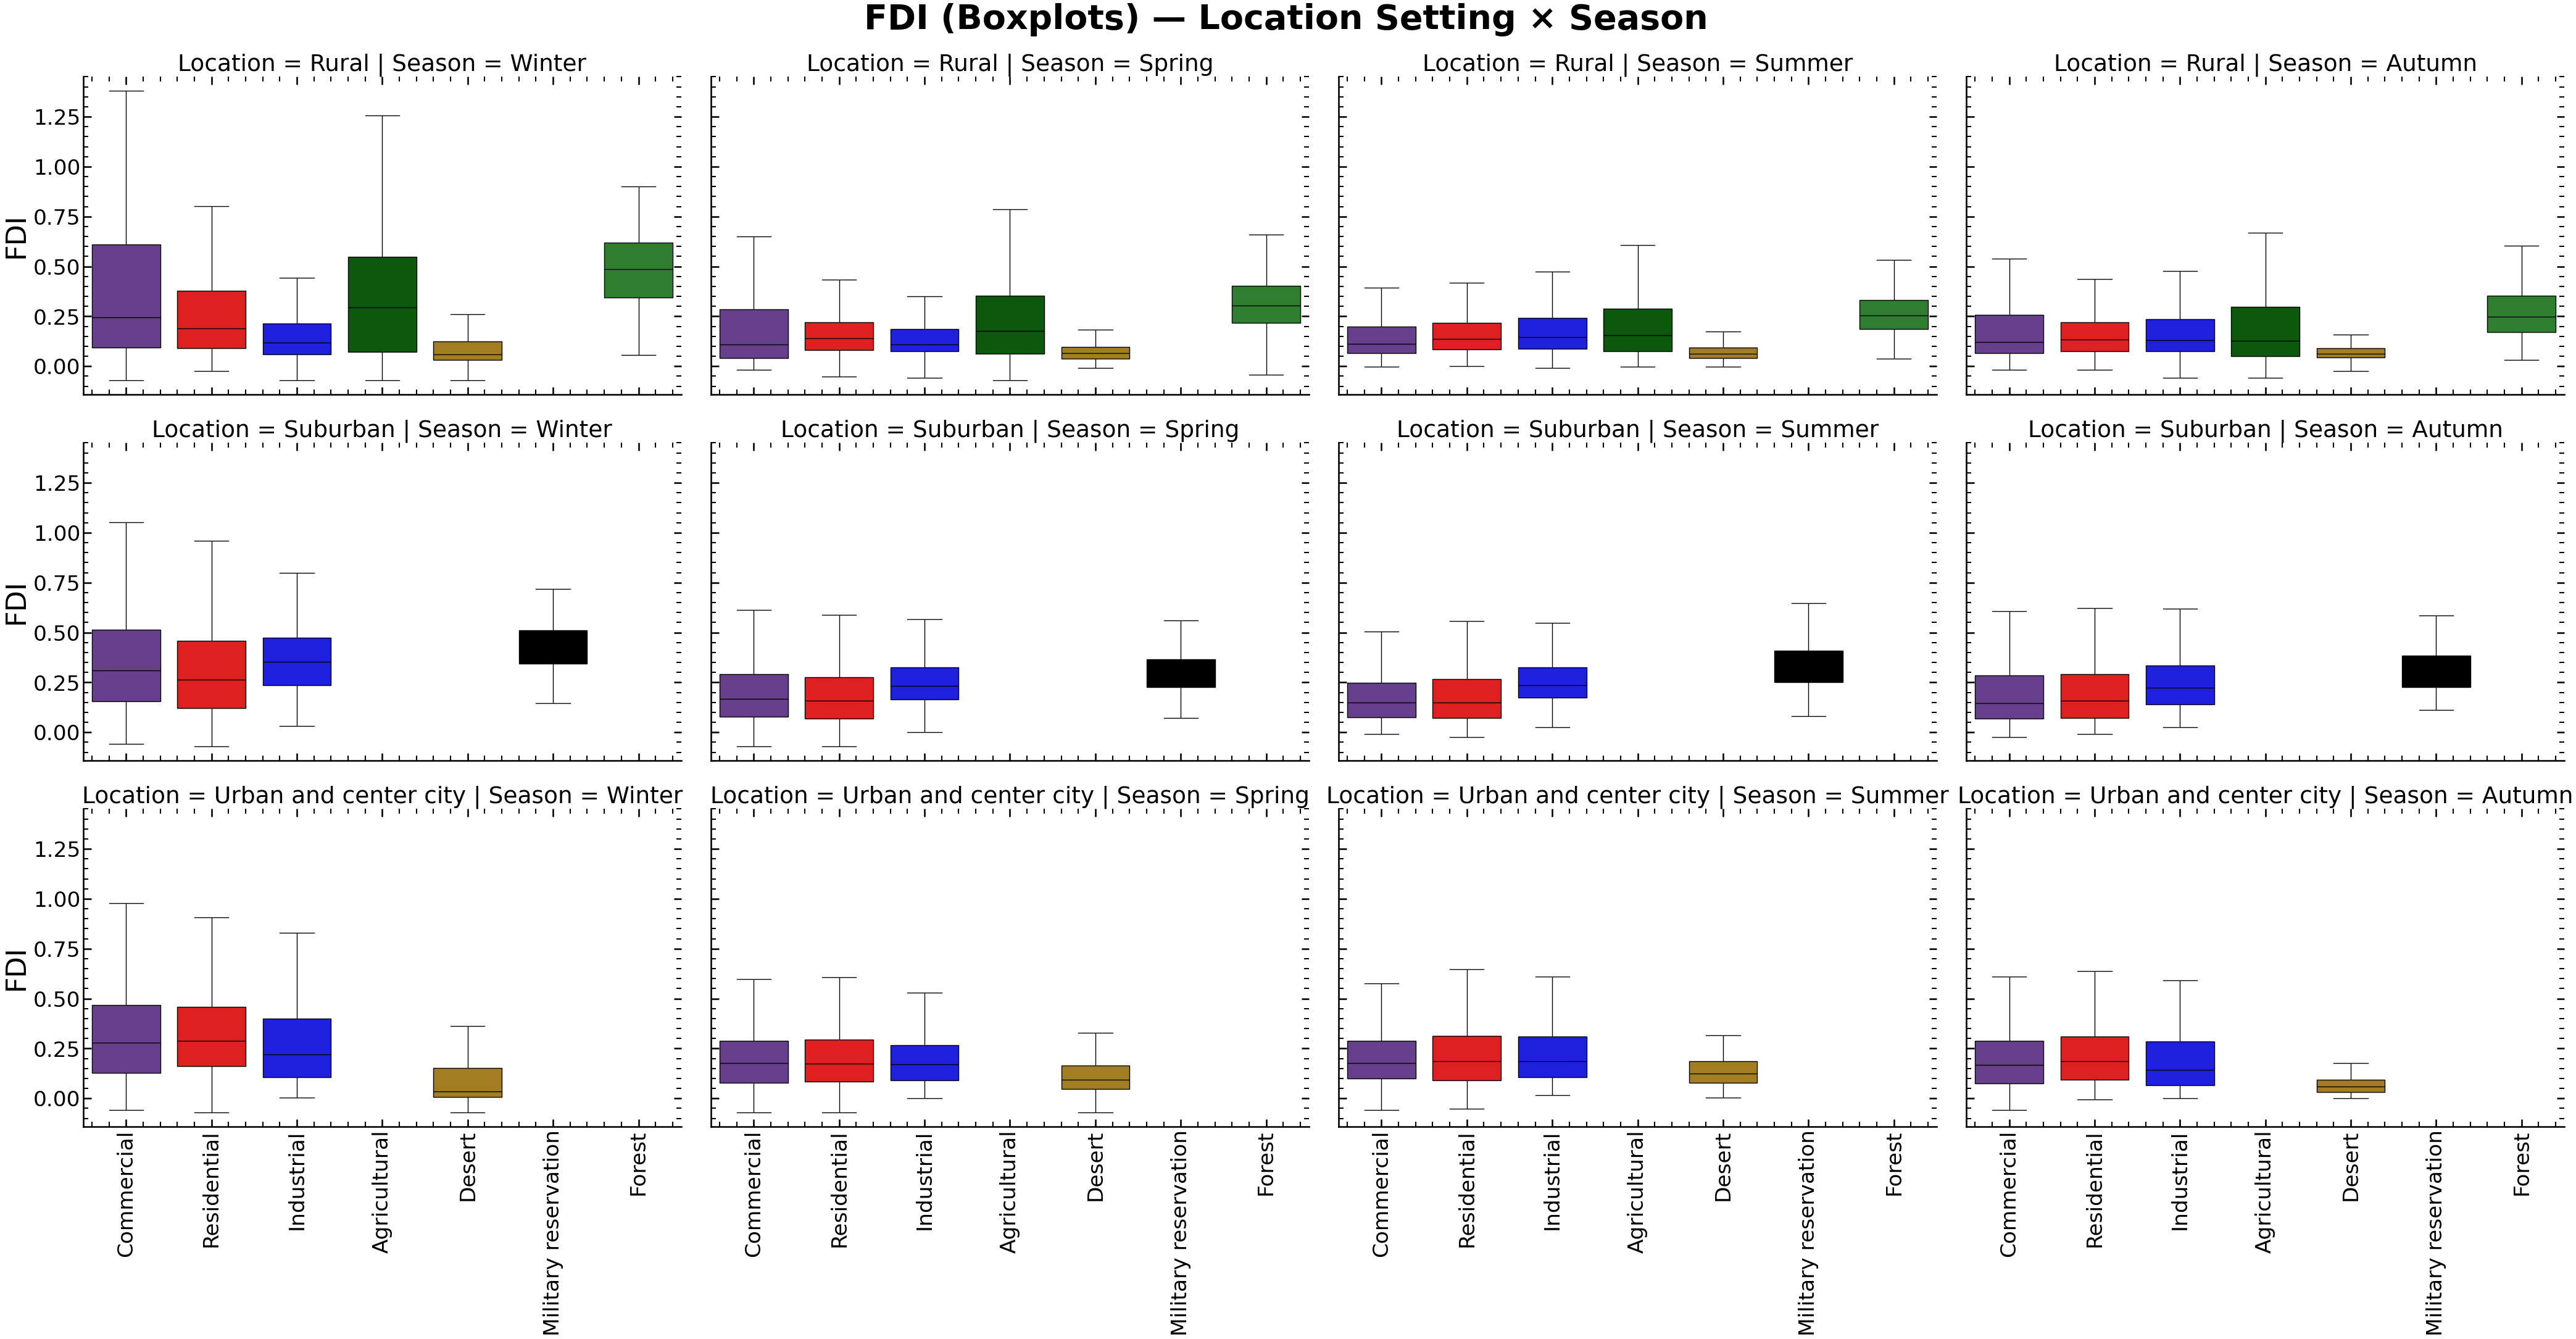

In [71]:
import numpy as np
import pandas as pd

# Copia y columnas mínimas
df = data_all00.copy()

# Asegura Season (si no existe)
if "Season" not in df.columns:
    def season_from_date(dt):
        m = dt.month
        if m in (12,1,2): return "Winter"
        if m in (3,4,5):  return "Spring"
        if m in (6,7,8):  return "Summer"
        return "Autumn"
    df["Season"] = df.index.map(season_from_date)


# Limpieza básica
df = (df
      .replace([np.inf, -np.inf], np.nan)
      .dropna(subset=["FDI","Land Use","Location Setting","Season"]))
df = df[df["PM10"] > 0]

# Normaliza etiquetas (quita espacios, etc.)
for col in ["Land Use","Location Setting","Season"]:
    df[col] = df[col].astype(str).str.strip()

# Órdenes fijos
order_lu = ['Commercial','Residential','Industrial','Agricultural',
            'Desert','Military reservation','Forest']
order_loc = ['Rural','Suburban','Urban and center city']
order_season = ['Winter','Spring','Summer','Autumn']

# Convierte a categóricas ordenadas (y quita categorías no usadas)
df["Land Use"] = pd.Categorical(df["Land Use"], categories=order_lu, ordered=True)
df["Location Setting"] = pd.Categorical(df["Location Setting"], categories=order_loc, ordered=True)
df["Season"] = pd.Categorical(df["Season"], categories=order_season, ordered=True)

# MUY IMPORTANTE: índice simple sin duplicados
df_viz = (df[["Land Use","Location Setting","Season","FDI"]]
          .reset_index(drop=True))
df_viz.rename(columns={"Location Setting":"Location"},inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk", font_scale=1.5)
g = sns.catplot(
    data=df_viz,
    kind="box",
    x="Land Use", y="FDI",
    row="Location", col="Season",
    order=order_lu, row_order=order_loc, col_order=order_season,
    showfliers=False, width=0.8, hue="Land Use", 
    height=6.6, aspect=1.6, legend_out=False, palette=colors, legend=False,
)
for ax in g.axes.flat:
    ax.tick_params(axis="x", rotation=90, zorder="right")
    ax.set_xlabel("")
    ax.set_ylabel("FDI", fontsize=32)

g.fig.subplots_adjust(top=0.92,wspace=0.05,hspace=0.15)
g.fig.suptitle("FDI (Boxplots) — Location Setting × Season", fontsize=40, fontweight="bold")
g.fig.savefig("figures/fig2_fdi_box_facets.png", dpi=300, bbox_inches="tight")
plt.show()
